In [18]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from scipy import stats


In [19]:
data = pd.read_csv("C:/Users/aqing/Desktop/dog/dog.csv") 
#X = data[['scale', 'sr',  'size','keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value','TI','SI']].values
N=[ 'scale', 'sr','contrast','Hue1','Hue3',
   	'Hue5',	'Hue6',	'Saturation','TI']
'''
[ 'scale', 'sr', 'keypoint','brightness','contrast','edgeLength','Hue1','Hue2','Hue3',
   'Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation', 'Value','TI','SI', 'first_frame']

['scale', 'sr',  'size','brightness','contrast','edgeLength',
          'Hue2','Hue4',	'Hue5','Hue7',	'Value','TI','SI']'''
X = data[N].values


Y = data.vmaf.values.reshape(-1, 1)

#train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.999,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
train_x2,test_x,train_y2,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行

#print(type(train_x))

#将数据转换成Tensor LongTensor等价于int64
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
test_y = torch.from_numpy(test_y).type(torch.FloatTensor)
print(test_x.shape,train_x.shape,X.shape)
points = int(test_x.shape[1])

#数据只有3805行故batchsize设置8较优

batch = 8#32
no_of_batches = len(data)//batch
epochs = 3000#3000

#TensorDataset()可以对tensor进行打包即合并
train_ds = TensorDataset(train_x,train_y)
#希望模型不关注训练集数据顺序故用乱序
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
test_ds = TensorDataset(test_x,test_y)
#对测试集不需要用乱序避免工作量增加
test_dl = DataLoader(test_ds,batch_size=batch)
#print(test_x,test_y)
#print(data)

torch.Size([603, 9]) torch.Size([3011, 9]) (3015, 9)


In [20]:
#创建模型
#继承nn.Module这个类并自定义模型
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(points,points*2)  # 输入是一个点对（x1，x2）,所以我们输入的神经节点是两个
        self.linear2 = nn.Linear(points*2,points*2, bias=True)
        self.linear3 = nn.Linear(points*2,points*2, bias=True)
        self.linear4 = nn.Linear(points*2,points*2, bias=True)
        self.linear5 = nn.Linear(points*2,points, bias=True)
        self.linear6 = nn.Linear(points,1)  # 输出层由于是二分类，所以输出节点是2
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        c =self.linear6(x)
        #c = F.softmax(self.linear6(x),dim=1)
        return c

epoch:  0 train_loss:  331.982 train_acc:  78.106 test_loss:  337.32 test_acc:  78.1
epoch:  1 train_loss:  226.48 train_acc:  81.946 test_loss:  228.58 test_acc:  81.955
epoch:  2 train_loss:  167.061 train_acc:  84.348 test_loss:  170.368 test_acc:  84.23
epoch:  3 train_loss:  139.547 train_acc:  86.011 test_loss:  141.946 test_acc:  85.919
epoch:  4 train_loss:  127.653 train_acc:  86.955 test_loss:  127.271 test_acc:  86.998
epoch:  5 train_loss:  120.115 train_acc:  87.209 test_loss:  120.443 test_acc:  87.22
epoch:  6 train_loss:  117.08 train_acc:  87.332 test_loss:  117.897 test_acc:  87.315
epoch:  7 train_loss:  108.755 train_acc:  87.933 test_loss:  107.723 test_acc:  88.018
epoch:  8 train_loss:  119.835 train_acc:  87.242 test_loss:  116.326 test_acc:  87.474
epoch:  9 train_loss:  101.984 train_acc:  88.218 test_loss:  102.049 test_acc:  88.235
epoch:  10 train_loss:  93.344 train_acc:  88.785 test_loss:  92.358 test_acc:  88.87
min loss epoch:10
                Actual  

epoch:  23 train_loss:  46.371 train_acc:  92.524 test_loss:  46.914 test_acc:  92.5
min loss epoch:23
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(80.3694)]
1    [tensor(89.2890)]  [tensor(99.2365)]
2    [tensor(90.4645)]  [tensor(88.0295)]
3    [tensor(84.3258)]  [tensor(92.5286)]
4    [tensor(91.9980)]  [tensor(94.8100)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(70.5038)]
599  [tensor(70.4211)]  [tensor(67.6159)]
600  [tensor(42.4919)]  [tensor(54.2428)]
601  [tensor(87.9492)]  [tensor(89.3460)]
602  [tensor(85.5643)]  [tensor(76.3235)]

[603 rows x 2 columns]
max acc epoch：23        max acc：92.5
epoch:  24 train_loss:  48.392 train_acc:  92.418 test_loss:  48.872 test_acc:  92.418
epoch:  25 train_loss:  49.385 train_acc:  92.354 test_loss:  50.28 test_acc:  92.309
epoch:  26 train_loss:  43.603 train_acc:  92.849 test_loss:  44.382 test_acc:  92.849
min loss epoch:26
                Actual          Predicted
0    [tensor

epoch:  46 train_loss:  35.173 train_acc:  93.681 test_loss:  36.289 test_acc:  93.566
epoch:  47 train_loss:  42.33 train_acc:  92.983 test_loss:  41.473 test_acc:  93.09
epoch:  48 train_loss:  27.656 train_acc:  94.685 test_loss:  27.78 test_acc:  94.71
min loss epoch:48
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(79.9403)]
1    [tensor(89.2890)]  [tensor(99.6795)]
2    [tensor(90.4645)]  [tensor(89.4953)]
3    [tensor(84.3258)]  [tensor(91.5855)]
4    [tensor(91.9980)]  [tensor(95.3305)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(67.8935)]
599  [tensor(70.4211)]  [tensor(74.9919)]
600  [tensor(42.4919)]  [tensor(48.2037)]
601  [tensor(87.9492)]  [tensor(88.7849)]
602  [tensor(85.5643)]  [tensor(80.7279)]

[603 rows x 2 columns]
max acc epoch：48        max acc：94.71
epoch:  49 train_loss:  30.477 train_acc:  94.523 test_loss:  30.278 test_acc:  94.594
epoch:  50 train_loss:  26.314 train_acc:  94.974 test_loss:  26.518 tes

epoch:  69 train_loss:  19.913 train_acc:  95.94 test_loss:  19.629 test_acc:  96.026
epoch:  70 train_loss:  19.528 train_acc:  96.17 test_loss:  19.147 test_acc:  96.275
max acc epoch：70        max acc：96.275
epoch:  71 train_loss:  21.034 train_acc:  95.874 test_loss:  20.114 test_acc:  96.074
epoch:  72 train_loss:  19.563 train_acc:  96.31 test_loss:  19.151 test_acc:  96.445
max acc epoch：72        max acc：96.445
epoch:  73 train_loss:  19.029 train_acc:  96.083 test_loss:  18.395 test_acc:  96.195
min loss epoch:73
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(81.5890)]
1    [tensor(89.2890)]  [tensor(95.5880)]
2    [tensor(90.4645)]  [tensor(86.7164)]
3    [tensor(84.3258)]  [tensor(88.9010)]
4    [tensor(91.9980)]  [tensor(90.3896)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(73.7224)]
599  [tensor(70.4211)]  [tensor(78.0397)]
600  [tensor(42.4919)]  [tensor(41.6837)]
601  [tensor(87.9492)]  [tensor(86.8043)]
602  [tens

epoch:  111 train_loss:  18.038 train_acc:  96.211 test_loss:  16.904 test_acc:  96.391
epoch:  112 train_loss:  17.011 train_acc:  96.537 test_loss:  15.987 test_acc:  96.703
min loss epoch:112
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(81.2486)]
1    [tensor(89.2890)]  [tensor(95.2057)]
2    [tensor(90.4645)]  [tensor(87.3599)]
3    [tensor(84.3258)]  [tensor(89.6287)]
4    [tensor(91.9980)]  [tensor(90.1455)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(73.1935)]
599  [tensor(70.4211)]  [tensor(75.8950)]
600  [tensor(42.4919)]  [tensor(42.5045)]
601  [tensor(87.9492)]  [tensor(87.7614)]
602  [tensor(85.5643)]  [tensor(83.3904)]

[603 rows x 2 columns]
epoch:  113 train_loss:  17.584 train_acc:  96.258 test_loss:  16.329 test_acc:  96.499
epoch:  114 train_loss:  18.804 train_acc:  96.33 test_loss:  17.914 test_acc:  96.453
epoch:  115 train_loss:  22.823 train_acc:  95.325 test_loss:  20.622 test_acc:  95.698
epoch:  116 tr

epoch:  165 train_loss:  16.405 train_acc:  96.66 test_loss:  15.254 test_acc:  96.9
epoch:  166 train_loss:  16.329 train_acc:  96.571 test_loss:  15.06 test_acc:  96.812
epoch:  167 train_loss:  27.998 train_acc:  94.612 test_loss:  24.407 test_acc:  95.092
epoch:  168 train_loss:  28.081 train_acc:  94.555 test_loss:  25.863 test_acc:  94.881
epoch:  169 train_loss:  17.036 train_acc:  96.347 test_loss:  15.674 test_acc:  96.607
epoch:  170 train_loss:  20.955 train_acc:  95.482 test_loss:  19.91 test_acc:  95.653
epoch:  171 train_loss:  17.316 train_acc:  96.243 test_loss:  16.361 test_acc:  96.408
epoch:  172 train_loss:  16.805 train_acc:  96.586 test_loss:  15.792 test_acc:  96.762
epoch:  173 train_loss:  16.113 train_acc:  96.652 test_loss:  14.873 test_acc:  96.902
min loss epoch:173
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(81.0340)]
1    [tensor(89.2890)]  [tensor(94.0389)]
2    [tensor(90.4645)]  [tensor(87.0454)]
3    [tensor(84.3258)]  [t

epoch:  221 train_loss:  15.778 train_acc:  96.694 test_loss:  14.839 test_acc:  96.854
epoch:  222 train_loss:  16.297 train_acc:  96.595 test_loss:  15.209 test_acc:  96.82
epoch:  223 train_loss:  16.726 train_acc:  96.289 test_loss:  15.411 test_acc:  96.52
epoch:  224 train_loss:  15.484 train_acc:  96.748 test_loss:  14.358 test_acc:  96.986
epoch:  225 train_loss:  16.191 train_acc:  96.563 test_loss:  14.83 test_acc:  96.868
epoch:  226 train_loss:  15.664 train_acc:  96.71 test_loss:  14.459 test_acc:  96.978
epoch:  227 train_loss:  17.028 train_acc:  96.37 test_loss:  15.801 test_acc:  96.552
epoch:  228 train_loss:  16.607 train_acc:  96.572 test_loss:  15.601 test_acc:  96.801
epoch:  229 train_loss:  16.226 train_acc:  96.509 test_loss:  15.24 test_acc:  96.673
epoch:  230 train_loss:  15.816 train_acc:  96.754 test_loss:  14.752 test_acc:  96.969
epoch:  231 train_loss:  16.543 train_acc:  96.435 test_loss:  15.16 test_acc:  96.746
epoch:  232 train_loss:  17.736 train_a

epoch:  287 train_loss:  16.679 train_acc:  96.393 test_loss:  15.464 test_acc:  96.598
epoch:  288 train_loss:  15.645 train_acc:  96.671 test_loss:  14.546 test_acc:  96.836
epoch:  289 train_loss:  14.683 train_acc:  96.915 test_loss:  13.553 test_acc:  97.158
epoch:  290 train_loss:  18.234 train_acc:  95.949 test_loss:  16.648 test_acc:  96.232
epoch:  291 train_loss:  16.262 train_acc:  96.495 test_loss:  15.179 test_acc:  96.673
epoch:  292 train_loss:  16.152 train_acc:  96.707 test_loss:  15.287 test_acc:  96.872
epoch:  293 train_loss:  14.992 train_acc:  96.885 test_loss:  13.978 test_acc:  97.064
epoch:  294 train_loss:  14.802 train_acc:  96.94 test_loss:  13.753 test_acc:  97.167
epoch:  295 train_loss:  15.04 train_acc:  96.907 test_loss:  13.985 test_acc:  97.11
epoch:  296 train_loss:  15.077 train_acc:  96.753 test_loss:  13.96 test_acc:  97.015
epoch:  297 train_loss:  17.427 train_acc:  96.137 test_loss:  16.292 test_acc:  96.341
epoch:  298 train_loss:  14.974 trai

epoch:  351 train_loss:  14.329 train_acc:  96.779 test_loss:  13.587 test_acc:  96.94
epoch:  352 train_loss:  14.944 train_acc:  96.789 test_loss:  14.344 test_acc:  96.942
epoch:  353 train_loss:  15.118 train_acc:  96.568 test_loss:  14.081 test_acc:  96.751
epoch:  354 train_loss:  13.652 train_acc:  96.916 test_loss:  12.93 test_acc:  97.061
epoch:  355 train_loss:  16.632 train_acc:  96.371 test_loss:  15.973 test_acc:  96.523
epoch:  356 train_loss:  14.11 train_acc:  96.939 test_loss:  13.305 test_acc:  97.118
epoch:  357 train_loss:  13.595 train_acc:  97.003 test_loss:  12.924 test_acc:  97.135
epoch:  358 train_loss:  18.974 train_acc:  95.777 test_loss:  18.004 test_acc:  95.96
epoch:  359 train_loss:  13.548 train_acc:  96.969 test_loss:  12.782 test_acc:  97.118
min loss epoch:359
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(81.5528)]
1    [tensor(89.2890)]  [tensor(91.9714)]
2    [tensor(90.4645)]  [tensor(86.6840)]
3    [tensor(84.3258)]  [

epoch:  404 train_loss:  13.117 train_acc:  97.098 test_loss:  12.514 test_acc:  97.229
epoch:  405 train_loss:  13.052 train_acc:  96.94 test_loss:  12.492 test_acc:  97.067
epoch:  406 train_loss:  15.102 train_acc:  96.595 test_loss:  13.926 test_acc:  96.777
epoch:  407 train_loss:  13.627 train_acc:  97.053 test_loss:  12.899 test_acc:  97.202
epoch:  408 train_loss:  13.239 train_acc:  96.835 test_loss:  12.482 test_acc:  97.013
epoch:  409 train_loss:  12.359 train_acc:  97.142 test_loss:  11.784 test_acc:  97.27
min loss epoch:409
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(82.6366)]
1    [tensor(89.2890)]  [tensor(90.2090)]
2    [tensor(90.4645)]  [tensor(85.6269)]
3    [tensor(84.3258)]  [tensor(86.8192)]
4    [tensor(91.9980)]  [tensor(89.3437)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.8607)]
599  [tensor(70.4211)]  [tensor(72.2215)]
600  [tensor(42.4919)]  [tensor(42.3324)]
601  [tensor(87.9492)]  [tensor(86.

epoch:  457 train_loss:  12.096 train_acc:  97.048 test_loss:  11.456 test_acc:  97.192
epoch:  458 train_loss:  16.048 train_acc:  96.105 test_loss:  15.221 test_acc:  96.279
epoch:  459 train_loss:  11.693 train_acc:  97.29 test_loss:  11.007 test_acc:  97.4
min loss epoch:459
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(82.9837)]
1    [tensor(89.2890)]  [tensor(89.8670)]
2    [tensor(90.4645)]  [tensor(85.8767)]
3    [tensor(84.3258)]  [tensor(86.8205)]
4    [tensor(91.9980)]  [tensor(90.9376)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.7495)]
599  [tensor(70.4211)]  [tensor(71.5968)]
600  [tensor(42.4919)]  [tensor(42.4757)]
601  [tensor(87.9492)]  [tensor(86.2119)]
602  [tensor(85.5643)]  [tensor(84.1530)]

[603 rows x 2 columns]
epoch:  460 train_loss:  12.129 train_acc:  97.011 test_loss:  11.356 test_acc:  97.181
epoch:  461 train_loss:  12.913 train_acc:  96.938 test_loss:  12.138 test_acc:  97.087
epoch:  462 trai

epoch:  503 train_loss:  11.527 train_acc:  97.212 test_loss:  10.908 test_acc:  97.304
epoch:  504 train_loss:  14.048 train_acc:  96.852 test_loss:  13.42 test_acc:  96.951
epoch:  505 train_loss:  11.855 train_acc:  97.145 test_loss:  10.969 test_acc:  97.251
epoch:  506 train_loss:  11.36 train_acc:  97.337 test_loss:  10.391 test_acc:  97.501
epoch:  507 train_loss:  11.741 train_acc:  97.192 test_loss:  10.835 test_acc:  97.322
epoch:  508 train_loss:  10.85 train_acc:  97.444 test_loss:  9.973 test_acc:  97.585
min loss epoch:508
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(82.2128)]
1    [tensor(89.2890)]  [tensor(90.1029)]
2    [tensor(90.4645)]  [tensor(86.7016)]
3    [tensor(84.3258)]  [tensor(87.2724)]
4    [tensor(91.9980)]  [tensor(91.1301)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.9655)]
599  [tensor(70.4211)]  [tensor(70.9231)]
600  [tensor(42.4919)]  [tensor(42.5012)]
601  [tensor(87.9492)]  [tensor(86.96

epoch:  568 train_loss:  19.524 train_acc:  95.441 test_loss:  18.566 test_acc:  95.581
epoch:  569 train_loss:  10.742 train_acc:  97.283 test_loss:  9.824 test_acc:  97.389
epoch:  570 train_loss:  12.36 train_acc:  97.209 test_loss:  11.418 test_acc:  97.298
epoch:  571 train_loss:  10.371 train_acc:  97.514 test_loss:  9.424 test_acc:  97.681
min loss epoch:571
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(83.0975)]
1    [tensor(89.2890)]  [tensor(90.2495)]
2    [tensor(90.4645)]  [tensor(86.3578)]
3    [tensor(84.3258)]  [tensor(87.4737)]
4    [tensor(91.9980)]  [tensor(91.2181)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(73.2184)]
599  [tensor(70.4211)]  [tensor(71.5174)]
600  [tensor(42.4919)]  [tensor(42.5549)]
601  [tensor(87.9492)]  [tensor(86.9851)]
602  [tensor(85.5643)]  [tensor(83.9690)]

[603 rows x 2 columns]
epoch:  572 train_loss:  10.496 train_acc:  97.493 test_loss:  9.479 test_acc:  97.648
epoch:  573 train

epoch:  637 train_loss:  10.961 train_acc:  97.121 test_loss:  10.057 test_acc:  97.277
epoch:  638 train_loss:  9.572 train_acc:  97.611 test_loss:  8.689 test_acc:  97.758
min loss epoch:638
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(82.8157)]
1    [tensor(89.2890)]  [tensor(90.3268)]
2    [tensor(90.4645)]  [tensor(87.5904)]
3    [tensor(84.3258)]  [tensor(88.2585)]
4    [tensor(91.9980)]  [tensor(91.8482)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.9261)]
599  [tensor(70.4211)]  [tensor(70.8073)]
600  [tensor(42.4919)]  [tensor(43.2650)]
601  [tensor(87.9492)]  [tensor(86.9479)]
602  [tensor(85.5643)]  [tensor(85.7722)]

[603 rows x 2 columns]
max acc epoch：638        max acc：97.758
epoch:  639 train_loss:  13.168 train_acc:  96.784 test_loss:  12.048 test_acc:  96.964
epoch:  640 train_loss:  12.516 train_acc:  96.865 test_loss:  11.805 test_acc:  96.947
epoch:  641 train_loss:  9.46 train_acc:  97.593 test_loss:  8.

epoch:  705 train_loss:  9.711 train_acc:  97.533 test_loss:  8.908 test_acc:  97.657
epoch:  706 train_loss:  10.428 train_acc:  97.223 test_loss:  9.669 test_acc:  97.351
epoch:  707 train_loss:  10.872 train_acc:  97.407 test_loss:  10.193 test_acc:  97.497
epoch:  708 train_loss:  9.623 train_acc:  97.483 test_loss:  8.681 test_acc:  97.605
epoch:  709 train_loss:  10.951 train_acc:  97.186 test_loss:  9.924 test_acc:  97.286
epoch:  710 train_loss:  9.431 train_acc:  97.534 test_loss:  8.298 test_acc:  97.685
min loss epoch:710
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(81.8628)]
1    [tensor(89.2890)]  [tensor(89.6364)]
2    [tensor(90.4645)]  [tensor(86.7958)]
3    [tensor(84.3258)]  [tensor(86.9195)]
4    [tensor(91.9980)]  [tensor(91.5275)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.6795)]
599  [tensor(70.4211)]  [tensor(70.9710)]
600  [tensor(42.4919)]  [tensor(42.9265)]
601  [tensor(87.9492)]  [tensor(86.1461)]

epoch:  768 train_loss:  9.294 train_acc:  97.617 test_loss:  8.429 test_acc:  97.737
epoch:  769 train_loss:  11.121 train_acc:  97.351 test_loss:  10.52 test_acc:  97.425
epoch:  770 train_loss:  10.295 train_acc:  97.398 test_loss:  9.306 test_acc:  97.535
epoch:  771 train_loss:  8.92 train_acc:  97.526 test_loss:  8.091 test_acc:  97.638
epoch:  772 train_loss:  9.603 train_acc:  97.384 test_loss:  8.609 test_acc:  97.492
epoch:  773 train_loss:  11.516 train_acc:  97.04 test_loss:  10.083 test_acc:  97.255
epoch:  774 train_loss:  9.649 train_acc:  97.588 test_loss:  8.468 test_acc:  97.708
epoch:  775 train_loss:  9.717 train_acc:  97.428 test_loss:  8.673 test_acc:  97.567
epoch:  776 train_loss:  9.721 train_acc:  97.254 test_loss:  8.827 test_acc:  97.39
epoch:  777 train_loss:  10.281 train_acc:  97.093 test_loss:  9.39 test_acc:  97.178
epoch:  778 train_loss:  9.264 train_acc:  97.602 test_loss:  8.411 test_acc:  97.723
epoch:  779 train_loss:  10.381 train_acc:  97.125 te

epoch:  843 train_loss:  9.196 train_acc:  97.471 test_loss:  8.23 test_acc:  97.594
epoch:  844 train_loss:  9.998 train_acc:  97.409 test_loss:  9.397 test_acc:  97.47
epoch:  845 train_loss:  10.155 train_acc:  97.308 test_loss:  9.412 test_acc:  97.387
epoch:  846 train_loss:  9.019 train_acc:  97.631 test_loss:  7.987 test_acc:  97.726
epoch:  847 train_loss:  8.606 train_acc:  97.759 test_loss:  7.321 test_acc:  97.909
min loss epoch:847
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(84.1529)]
1    [tensor(89.2890)]  [tensor(89.5715)]
2    [tensor(90.4645)]  [tensor(87.0366)]
3    [tensor(84.3258)]  [tensor(86.9036)]
4    [tensor(91.9980)]  [tensor(92.7575)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(72.1344)]
599  [tensor(70.4211)]  [tensor(71.0505)]
600  [tensor(42.4919)]  [tensor(42.5656)]
601  [tensor(87.9492)]  [tensor(86.0943)]
602  [tensor(85.5643)]  [tensor(84.6116)]

[603 rows x 2 columns]
max acc epoch：847       

epoch:  925 train_loss:  9.49 train_acc:  97.433 test_loss:  8.668 test_acc:  97.549
epoch:  926 train_loss:  8.529 train_acc:  97.715 test_loss:  7.729 test_acc:  97.856
epoch:  927 train_loss:  9.311 train_acc:  97.506 test_loss:  8.556 test_acc:  97.636
epoch:  928 train_loss:  8.247 train_acc:  97.749 test_loss:  7.362 test_acc:  97.909
epoch:  929 train_loss:  7.949 train_acc:  97.728 test_loss:  6.76 test_acc:  97.918
min loss epoch:929
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(84.5847)]
1    [tensor(89.2890)]  [tensor(89.0482)]
2    [tensor(90.4645)]  [tensor(86.6927)]
3    [tensor(84.3258)]  [tensor(86.2077)]
4    [tensor(91.9980)]  [tensor(92.2116)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.7253)]
599  [tensor(70.4211)]  [tensor(72.1346)]
600  [tensor(42.4919)]  [tensor(41.8704)]
601  [tensor(87.9492)]  [tensor(87.0761)]
602  [tensor(85.5643)]  [tensor(84.1022)]

[603 rows x 2 columns]
epoch:  930 train_loss:  

epoch:  988 train_loss:  11.837 train_acc:  96.996 test_loss:  10.304 test_acc:  97.15
epoch:  989 train_loss:  9.758 train_acc:  97.317 test_loss:  8.251 test_acc:  97.46
epoch:  990 train_loss:  7.844 train_acc:  97.644 test_loss:  6.902 test_acc:  97.796
epoch:  991 train_loss:  9.702 train_acc:  97.325 test_loss:  8.634 test_acc:  97.435
epoch:  992 train_loss:  8.855 train_acc:  97.398 test_loss:  8.063 test_acc:  97.537
epoch:  993 train_loss:  8.849 train_acc:  97.621 test_loss:  6.977 test_acc:  97.853
epoch:  994 train_loss:  7.712 train_acc:  97.812 test_loss:  6.327 test_acc:  97.994
epoch:  995 train_loss:  8.664 train_acc:  97.384 test_loss:  7.238 test_acc:  97.517
epoch:  996 train_loss:  10.721 train_acc:  97.332 test_loss:  9.138 test_acc:  97.393
epoch:  997 train_loss:  8.289 train_acc:  97.417 test_loss:  7.431 test_acc:  97.499
epoch:  998 train_loss:  9.209 train_acc:  97.358 test_loss:  7.49 test_acc:  97.583
epoch:  999 train_loss:  8.864 train_acc:  97.645 test

epoch:  1070 train_loss:  10.402 train_acc:  97.101 test_loss:  9.248 test_acc:  97.33
epoch:  1071 train_loss:  11.373 train_acc:  96.964 test_loss:  10.576 test_acc:  97.095
epoch:  1072 train_loss:  7.579 train_acc:  97.806 test_loss:  6.489 test_acc:  97.963
epoch:  1073 train_loss:  8.598 train_acc:  97.563 test_loss:  7.823 test_acc:  97.706
epoch:  1074 train_loss:  13.051 train_acc:  96.505 test_loss:  11.819 test_acc:  96.573
epoch:  1075 train_loss:  10.216 train_acc:  96.877 test_loss:  8.846 test_acc:  96.998
epoch:  1076 train_loss:  8.197 train_acc:  97.781 test_loss:  7.214 test_acc:  97.981
epoch:  1077 train_loss:  9.352 train_acc:  97.537 test_loss:  7.516 test_acc:  97.636
epoch:  1078 train_loss:  15.693 train_acc:  95.89 test_loss:  14.881 test_acc:  95.957
epoch:  1079 train_loss:  7.288 train_acc:  97.791 test_loss:  6.481 test_acc:  97.945
epoch:  1080 train_loss:  7.949 train_acc:  97.7 test_loss:  6.645 test_acc:  97.824
epoch:  1081 train_loss:  10.379 train_

epoch:  1139 train_loss:  8.282 train_acc:  97.699 test_loss:  6.475 test_acc:  97.818
epoch:  1140 train_loss:  13.663 train_acc:  97.168 test_loss:  10.679 test_acc:  97.358
epoch:  1141 train_loss:  8.968 train_acc:  97.619 test_loss:  6.777 test_acc:  97.784
epoch:  1142 train_loss:  6.929 train_acc:  97.8 test_loss:  5.981 test_acc:  97.942
epoch:  1143 train_loss:  7.133 train_acc:  97.824 test_loss:  6.313 test_acc:  97.951
epoch:  1144 train_loss:  8.425 train_acc:  97.349 test_loss:  7.282 test_acc:  97.48
epoch:  1145 train_loss:  7.459 train_acc:  97.754 test_loss:  6.453 test_acc:  97.916
epoch:  1146 train_loss:  13.69 train_acc:  97.357 test_loss:  10.207 test_acc:  97.501
epoch:  1147 train_loss:  7.656 train_acc:  97.817 test_loss:  7.079 test_acc:  97.941
epoch:  1148 train_loss:  8.491 train_acc:  97.649 test_loss:  7.86 test_acc:  97.803
epoch:  1149 train_loss:  7.074 train_acc:  97.791 test_loss:  6.386 test_acc:  97.935
epoch:  1150 train_loss:  10.149 train_acc: 

epoch:  1207 train_loss:  18.296 train_acc:  96.01 test_loss:  17.07 test_acc:  96.235
epoch:  1208 train_loss:  10.584 train_acc:  97.164 test_loss:  8.756 test_acc:  97.319
epoch:  1209 train_loss:  7.397 train_acc:  97.602 test_loss:  6.644 test_acc:  97.697
epoch:  1210 train_loss:  9.386 train_acc:  97.486 test_loss:  8.865 test_acc:  97.613
epoch:  1211 train_loss:  8.704 train_acc:  97.325 test_loss:  6.941 test_acc:  97.478
epoch:  1212 train_loss:  9.41 train_acc:  97.198 test_loss:  8.123 test_acc:  97.339
epoch:  1213 train_loss:  6.893 train_acc:  97.815 test_loss:  6.039 test_acc:  97.988
epoch:  1214 train_loss:  6.539 train_acc:  97.941 test_loss:  5.528 test_acc:  98.072
epoch:  1215 train_loss:  6.626 train_acc:  97.892 test_loss:  5.27 test_acc:  98.078
epoch:  1216 train_loss:  7.223 train_acc:  97.79 test_loss:  6.391 test_acc:  97.949
epoch:  1217 train_loss:  9.804 train_acc:  97.498 test_loss:  7.847 test_acc:  97.641
epoch:  1218 train_loss:  11.953 train_acc:  

epoch:  1283 train_loss:  6.971 train_acc:  97.884 test_loss:  5.72 test_acc:  97.982
epoch:  1284 train_loss:  6.941 train_acc:  97.804 test_loss:  6.143 test_acc:  97.869
epoch:  1285 train_loss:  5.987 train_acc:  97.887 test_loss:  5.076 test_acc:  98.027
epoch:  1286 train_loss:  6.948 train_acc:  97.947 test_loss:  5.235 test_acc:  98.087
epoch:  1287 train_loss:  12.513 train_acc:  96.99 test_loss:  9.991 test_acc:  97.196
epoch:  1288 train_loss:  8.694 train_acc:  97.647 test_loss:  8.113 test_acc:  97.753
epoch:  1289 train_loss:  6.568 train_acc:  97.902 test_loss:  5.752 test_acc:  98.002
epoch:  1290 train_loss:  10.188 train_acc:  97.318 test_loss:  7.563 test_acc:  97.518
epoch:  1291 train_loss:  8.84 train_acc:  97.469 test_loss:  8.165 test_acc:  97.568
epoch:  1292 train_loss:  8.048 train_acc:  97.686 test_loss:  6.153 test_acc:  97.82
epoch:  1293 train_loss:  6.199 train_acc:  97.866 test_loss:  5.446 test_acc:  97.929
epoch:  1294 train_loss:  7.665 train_acc:  9

epoch:  1371 train_loss:  7.741 train_acc:  97.81 test_loss:  5.648 test_acc:  97.96
epoch:  1372 train_loss:  17.639 train_acc:  96.725 test_loss:  12.697 test_acc:  96.82
epoch:  1373 train_loss:  5.745 train_acc:  97.977 test_loss:  4.821 test_acc:  98.057
epoch:  1374 train_loss:  5.375 train_acc:  97.94 test_loss:  4.422 test_acc:  98.058
epoch:  1375 train_loss:  9.034 train_acc:  97.15 test_loss:  7.69 test_acc:  97.324
epoch:  1376 train_loss:  6.277 train_acc:  97.886 test_loss:  4.993 test_acc:  98.006
epoch:  1377 train_loss:  7.003 train_acc:  98.016 test_loss:  5.058 test_acc:  98.202
epoch:  1378 train_loss:  14.899 train_acc:  95.657 test_loss:  14.132 test_acc:  95.739
epoch:  1379 train_loss:  7.836 train_acc:  97.931 test_loss:  6.023 test_acc:  98.099
epoch:  1380 train_loss:  6.985 train_acc:  97.906 test_loss:  4.81 test_acc:  98.134
epoch:  1381 train_loss:  5.788 train_acc:  97.943 test_loss:  5.156 test_acc:  98.047
epoch:  1382 train_loss:  7.682 train_acc:  97

epoch:  1452 train_loss:  8.619 train_acc:  97.327 test_loss:  7.037 test_acc:  97.378
epoch:  1453 train_loss:  5.305 train_acc:  97.958 test_loss:  4.43 test_acc:  98.081
epoch:  1454 train_loss:  7.054 train_acc:  97.65 test_loss:  6.358 test_acc:  97.691
epoch:  1455 train_loss:  6.87 train_acc:  97.837 test_loss:  6.204 test_acc:  97.958
epoch:  1456 train_loss:  8.27 train_acc:  97.965 test_loss:  5.378 test_acc:  98.137
epoch:  1457 train_loss:  5.587 train_acc:  98.053 test_loss:  4.911 test_acc:  98.169
epoch:  1458 train_loss:  6.005 train_acc:  97.958 test_loss:  5.212 test_acc:  98.035
epoch:  1459 train_loss:  11.71 train_acc:  97.179 test_loss:  10.951 test_acc:  97.319
epoch:  1460 train_loss:  5.87 train_acc:  97.89 test_loss:  5.101 test_acc:  98.032
epoch:  1461 train_loss:  9.74 train_acc:  96.997 test_loss:  7.955 test_acc:  97.106
epoch:  1462 train_loss:  14.118 train_acc:  96.066 test_loss:  13.019 test_acc:  96.103
epoch:  1463 train_loss:  6.581 train_acc:  97.

epoch:  1534 train_loss:  11.899 train_acc:  96.798 test_loss:  11.043 test_acc:  96.965
epoch:  1535 train_loss:  11.776 train_acc:  97.14 test_loss:  11.429 test_acc:  97.213
epoch:  1536 train_loss:  5.671 train_acc:  97.725 test_loss:  5.101 test_acc:  97.797
epoch:  1537 train_loss:  5.483 train_acc:  98.023 test_loss:  4.797 test_acc:  98.065
epoch:  1538 train_loss:  4.806 train_acc:  98.008 test_loss:  3.908 test_acc:  98.145
epoch:  1539 train_loss:  10.093 train_acc:  97.58 test_loss:  9.4 test_acc:  97.718
epoch:  1540 train_loss:  4.98 train_acc:  98.044 test_loss:  4.227 test_acc:  98.174
epoch:  1541 train_loss:  4.884 train_acc:  98.183 test_loss:  3.679 test_acc:  98.285
epoch:  1542 train_loss:  9.134 train_acc:  97.868 test_loss:  6.328 test_acc:  97.989
epoch:  1543 train_loss:  4.721 train_acc:  98.133 test_loss:  3.959 test_acc:  98.178
epoch:  1544 train_loss:  17.523 train_acc:  95.956 test_loss:  15.987 test_acc:  95.994
epoch:  1545 train_loss:  5.394 train_acc

epoch:  1616 train_loss:  4.339 train_acc:  98.251 test_loss:  3.745 test_acc:  98.311
epoch:  1617 train_loss:  5.18 train_acc:  98.131 test_loss:  3.611 test_acc:  98.244
epoch:  1618 train_loss:  4.659 train_acc:  98.016 test_loss:  3.918 test_acc:  98.027
epoch:  1619 train_loss:  6.843 train_acc:  97.928 test_loss:  6.419 test_acc:  98.001
epoch:  1620 train_loss:  5.175 train_acc:  97.964 test_loss:  4.329 test_acc:  98.037
epoch:  1621 train_loss:  6.122 train_acc:  97.789 test_loss:  5.172 test_acc:  97.849
epoch:  1622 train_loss:  6.644 train_acc:  97.764 test_loss:  6.353 test_acc:  97.843
epoch:  1623 train_loss:  6.426 train_acc:  97.76 test_loss:  5.186 test_acc:  97.885
epoch:  1624 train_loss:  6.689 train_acc:  97.803 test_loss:  6.347 test_acc:  97.889
epoch:  1625 train_loss:  4.606 train_acc:  98.031 test_loss:  4.117 test_acc:  98.092
epoch:  1626 train_loss:  8.44 train_acc:  97.889 test_loss:  7.782 test_acc:  98.016
epoch:  1627 train_loss:  5.507 train_acc:  98

epoch:  1692 train_loss:  4.62 train_acc:  98.008 test_loss:  4.441 test_acc:  98.018
epoch:  1693 train_loss:  9.428 train_acc:  97.574 test_loss:  6.709 test_acc:  97.661
epoch:  1694 train_loss:  5.56 train_acc:  98.095 test_loss:  4.153 test_acc:  98.187
epoch:  1695 train_loss:  7.283 train_acc:  97.515 test_loss:  6.918 test_acc:  97.613
epoch:  1696 train_loss:  4.411 train_acc:  98.168 test_loss:  3.822 test_acc:  98.201
epoch:  1697 train_loss:  6.255 train_acc:  97.79 test_loss:  5.237 test_acc:  97.821
epoch:  1698 train_loss:  4.604 train_acc:  98.118 test_loss:  3.711 test_acc:  98.153
epoch:  1699 train_loss:  4.382 train_acc:  98.066 test_loss:  3.758 test_acc:  98.109
epoch:  1700 train_loss:  4.259 train_acc:  98.201 test_loss:  3.522 test_acc:  98.251
epoch:  1701 train_loss:  4.662 train_acc:  97.952 test_loss:  4.151 test_acc:  97.974
epoch:  1702 train_loss:  5.628 train_acc:  97.778 test_loss:  5.524 test_acc:  97.759
epoch:  1703 train_loss:  10.155 train_acc:  9

epoch:  1780 train_loss:  4.553 train_acc:  98.18 test_loss:  3.843 test_acc:  98.254
epoch:  1781 train_loss:  11.209 train_acc:  97.992 test_loss:  7.174 test_acc:  98.094
epoch:  1782 train_loss:  5.655 train_acc:  97.931 test_loss:  5.204 test_acc:  98.022
epoch:  1783 train_loss:  7.672 train_acc:  97.546 test_loss:  8.092 test_acc:  97.575
epoch:  1784 train_loss:  6.223 train_acc:  98.02 test_loss:  4.837 test_acc:  98.099
epoch:  1785 train_loss:  4.911 train_acc:  97.906 test_loss:  4.414 test_acc:  97.958
epoch:  1786 train_loss:  4.683 train_acc:  98.172 test_loss:  4.17 test_acc:  98.243
epoch:  1787 train_loss:  13.459 train_acc:  96.441 test_loss:  12.971 test_acc:  96.534
epoch:  1788 train_loss:  7.19 train_acc:  97.584 test_loss:  6.774 test_acc:  97.649
epoch:  1789 train_loss:  4.603 train_acc:  98.278 test_loss:  3.617 test_acc:  98.351
epoch:  1790 train_loss:  4.835 train_acc:  97.985 test_loss:  4.285 test_acc:  98.059
epoch:  1791 train_loss:  7.314 train_acc:  

epoch:  1869 train_loss:  6.217 train_acc:  97.916 test_loss:  5.542 test_acc:  98.029
epoch:  1870 train_loss:  4.347 train_acc:  98.271 test_loss:  3.564 test_acc:  98.348
epoch:  1871 train_loss:  4.489 train_acc:  97.978 test_loss:  3.904 test_acc:  98.015
epoch:  1872 train_loss:  4.112 train_acc:  98.223 test_loss:  3.525 test_acc:  98.287
epoch:  1873 train_loss:  4.412 train_acc:  98.179 test_loss:  3.637 test_acc:  98.227
epoch:  1874 train_loss:  5.581 train_acc:  97.888 test_loss:  4.906 test_acc:  97.914
epoch:  1875 train_loss:  4.133 train_acc:  98.305 test_loss:  3.492 test_acc:  98.356
max acc epoch：1875        max acc：98.356
epoch:  1876 train_loss:  6.502 train_acc:  97.705 test_loss:  6.629 test_acc:  97.74
epoch:  1877 train_loss:  5.076 train_acc:  97.983 test_loss:  3.889 test_acc:  98.039
epoch:  1878 train_loss:  4.879 train_acc:  97.903 test_loss:  4.814 test_acc:  97.852
epoch:  1879 train_loss:  5.885 train_acc:  97.992 test_loss:  5.105 test_acc:  98.117
epo

epoch:  1963 train_loss:  4.264 train_acc:  98.064 test_loss:  3.639 test_acc:  98.085
epoch:  1964 train_loss:  5.301 train_acc:  98.017 test_loss:  4.083 test_acc:  98.101
epoch:  1965 train_loss:  12.011 train_acc:  97.552 test_loss:  7.618 test_acc:  97.707
epoch:  1966 train_loss:  9.806 train_acc:  97.64 test_loss:  9.187 test_acc:  97.767
epoch:  1967 train_loss:  8.605 train_acc:  97.8 test_loss:  8.109 test_acc:  97.884
epoch:  1968 train_loss:  10.1 train_acc:  97.647 test_loss:  9.208 test_acc:  97.761
epoch:  1969 train_loss:  4.022 train_acc:  98.273 test_loss:  3.336 test_acc:  98.288
epoch:  1970 train_loss:  4.893 train_acc:  98.062 test_loss:  3.886 test_acc:  98.138
epoch:  1971 train_loss:  5.417 train_acc:  97.799 test_loss:  4.26 test_acc:  97.835
epoch:  1972 train_loss:  9.808 train_acc:  97.761 test_loss:  7.087 test_acc:  97.907
epoch:  1973 train_loss:  5.335 train_acc:  98.137 test_loss:  3.753 test_acc:  98.217
epoch:  1974 train_loss:  4.698 train_acc:  98.

epoch:  2045 train_loss:  4.014 train_acc:  98.305 test_loss:  3.492 test_acc:  98.34
epoch:  2046 train_loss:  3.99 train_acc:  98.222 test_loss:  3.558 test_acc:  98.239
epoch:  2047 train_loss:  5.521 train_acc:  97.844 test_loss:  4.964 test_acc:  97.883
epoch:  2048 train_loss:  4.141 train_acc:  98.2 test_loss:  3.522 test_acc:  98.2
epoch:  2049 train_loss:  5.631 train_acc:  98.167 test_loss:  3.787 test_acc:  98.291
epoch:  2050 train_loss:  8.809 train_acc:  97.823 test_loss:  8.072 test_acc:  97.893
epoch:  2051 train_loss:  5.53 train_acc:  98.047 test_loss:  4.263 test_acc:  98.158
epoch:  2052 train_loss:  5.759 train_acc:  98.059 test_loss:  3.846 test_acc:  98.231
epoch:  2053 train_loss:  11.061 train_acc:  97.581 test_loss:  10.692 test_acc:  97.674
epoch:  2054 train_loss:  9.118 train_acc:  97.724 test_loss:  8.603 test_acc:  97.786
epoch:  2055 train_loss:  10.172 train_acc:  97.385 test_loss:  9.407 test_acc:  97.512
epoch:  2056 train_loss:  9.302 train_acc:  97.

epoch:  2134 train_loss:  6.503 train_acc:  97.74 test_loss:  6.047 test_acc:  97.878
epoch:  2135 train_loss:  5.121 train_acc:  98.111 test_loss:  4.007 test_acc:  98.17
epoch:  2136 train_loss:  4.003 train_acc:  98.33 test_loss:  3.383 test_acc:  98.361
epoch:  2137 train_loss:  4.534 train_acc:  98.209 test_loss:  3.614 test_acc:  98.252
epoch:  2138 train_loss:  11.086 train_acc:  96.263 test_loss:  10.824 test_acc:  96.21
epoch:  2139 train_loss:  5.71 train_acc:  97.594 test_loss:  5.135 test_acc:  97.573
epoch:  2140 train_loss:  4.226 train_acc:  98.079 test_loss:  3.638 test_acc:  98.078
epoch:  2141 train_loss:  4.638 train_acc:  98.208 test_loss:  3.32 test_acc:  98.268
epoch:  2142 train_loss:  3.874 train_acc:  98.361 test_loss:  3.367 test_acc:  98.391
epoch:  2143 train_loss:  6.845 train_acc:  97.345 test_loss:  5.967 test_acc:  97.35
epoch:  2144 train_loss:  4.5 train_acc:  98.157 test_loss:  3.944 test_acc:  98.211
epoch:  2145 train_loss:  4.685 train_acc:  98.123

epoch:  2228 train_loss:  4.805 train_acc:  98.108 test_loss:  4.149 test_acc:  98.138
epoch:  2229 train_loss:  6.258 train_acc:  97.421 test_loss:  5.718 test_acc:  97.445
epoch:  2230 train_loss:  5.57 train_acc:  98.026 test_loss:  4.111 test_acc:  98.105
epoch:  2231 train_loss:  11.867 train_acc:  97.346 test_loss:  11.28 test_acc:  97.415
epoch:  2232 train_loss:  9.272 train_acc:  97.568 test_loss:  8.669 test_acc:  97.697
epoch:  2233 train_loss:  9.673 train_acc:  97.141 test_loss:  9.125 test_acc:  97.228
epoch:  2234 train_loss:  9.464 train_acc:  97.422 test_loss:  8.94 test_acc:  97.482
epoch:  2235 train_loss:  8.195 train_acc:  97.784 test_loss:  7.52 test_acc:  97.897
epoch:  2236 train_loss:  7.767 train_acc:  97.773 test_loss:  7.078 test_acc:  97.911
epoch:  2237 train_loss:  7.838 train_acc:  97.7 test_loss:  7.284 test_acc:  97.785
epoch:  2238 train_loss:  8.116 train_acc:  97.668 test_loss:  7.477 test_acc:  97.736
epoch:  2239 train_loss:  7.529 train_acc:  97.

epoch:  2317 train_loss:  4.194 train_acc:  97.961 test_loss:  3.728 test_acc:  97.976
epoch:  2318 train_loss:  4.412 train_acc:  97.912 test_loss:  3.944 test_acc:  97.888
epoch:  2319 train_loss:  5.146 train_acc:  97.92 test_loss:  3.958 test_acc:  97.979
epoch:  2320 train_loss:  3.882 train_acc:  98.098 test_loss:  3.385 test_acc:  98.073
epoch:  2321 train_loss:  3.679 train_acc:  98.301 test_loss:  2.896 test_acc:  98.341
min loss epoch:2321
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(85.5292)]
1    [tensor(89.2890)]  [tensor(86.1764)]
2    [tensor(90.4645)]  [tensor(87.1342)]
3    [tensor(84.3258)]  [tensor(86.0367)]
4    [tensor(91.9980)]  [tensor(91.7164)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(71.5715)]
599  [tensor(70.4211)]  [tensor(69.9123)]
600  [tensor(42.4919)]  [tensor(42.1450)]
601  [tensor(87.9492)]  [tensor(86.8102)]
602  [tensor(85.5643)]  [tensor(83.2988)]

[603 rows x 2 columns]
epoch:  2322 train

epoch:  2406 train_loss:  4.487 train_acc:  98.248 test_loss:  3.194 test_acc:  98.321
epoch:  2407 train_loss:  4.098 train_acc:  98.114 test_loss:  3.557 test_acc:  98.171
epoch:  2408 train_loss:  3.891 train_acc:  98.25 test_loss:  3.359 test_acc:  98.28
epoch:  2409 train_loss:  3.621 train_acc:  98.316 test_loss:  3.089 test_acc:  98.347
epoch:  2410 train_loss:  3.6 train_acc:  98.339 test_loss:  3.162 test_acc:  98.368
epoch:  2411 train_loss:  3.974 train_acc:  98.26 test_loss:  3.425 test_acc:  98.265
epoch:  2412 train_loss:  3.86 train_acc:  98.198 test_loss:  3.479 test_acc:  98.181
epoch:  2413 train_loss:  6.813 train_acc:  97.435 test_loss:  6.151 test_acc:  97.457
epoch:  2414 train_loss:  3.729 train_acc:  98.191 test_loss:  3.216 test_acc:  98.222
epoch:  2415 train_loss:  4.16 train_acc:  98.308 test_loss:  3.042 test_acc:  98.394
epoch:  2416 train_loss:  4.599 train_acc:  98.217 test_loss:  3.581 test_acc:  98.296
epoch:  2417 train_loss:  4.67 train_acc:  97.976 

epoch:  2482 train_loss:  8.442 train_acc:  97.692 test_loss:  8.022 test_acc:  97.737
epoch:  2483 train_loss:  6.067 train_acc:  97.627 test_loss:  5.892 test_acc:  97.658
epoch:  2484 train_loss:  4.269 train_acc:  98.218 test_loss:  3.769 test_acc:  98.277
epoch:  2485 train_loss:  3.911 train_acc:  98.328 test_loss:  3.091 test_acc:  98.366
epoch:  2486 train_loss:  4.228 train_acc:  98.285 test_loss:  3.062 test_acc:  98.329
epoch:  2487 train_loss:  3.719 train_acc:  98.31 test_loss:  3.168 test_acc:  98.335
epoch:  2488 train_loss:  3.755 train_acc:  98.191 test_loss:  3.104 test_acc:  98.225
epoch:  2489 train_loss:  3.568 train_acc:  98.288 test_loss:  2.849 test_acc:  98.327
epoch:  2490 train_loss:  3.801 train_acc:  98.271 test_loss:  3.192 test_acc:  98.32
epoch:  2491 train_loss:  3.68 train_acc:  98.334 test_loss:  3.039 test_acc:  98.356
epoch:  2492 train_loss:  6.611 train_acc:  97.578 test_loss:  6.162 test_acc:  97.609
epoch:  2493 train_loss:  12.026 train_acc:  9

epoch:  2564 train_loss:  3.769 train_acc:  98.13 test_loss:  3.272 test_acc:  98.112
epoch:  2565 train_loss:  3.922 train_acc:  98.346 test_loss:  3.124 test_acc:  98.396
epoch:  2566 train_loss:  3.621 train_acc:  98.249 test_loss:  3.034 test_acc:  98.235
epoch:  2567 train_loss:  3.735 train_acc:  98.408 test_loss:  3.035 test_acc:  98.461
epoch:  2568 train_loss:  4.288 train_acc:  98.294 test_loss:  3.368 test_acc:  98.313
epoch:  2569 train_loss:  5.24 train_acc:  98.176 test_loss:  3.791 test_acc:  98.28
epoch:  2570 train_loss:  12.43 train_acc:  96.678 test_loss:  11.04 test_acc:  96.718
epoch:  2571 train_loss:  3.864 train_acc:  98.121 test_loss:  3.171 test_acc:  98.168
epoch:  2572 train_loss:  3.503 train_acc:  98.356 test_loss:  2.942 test_acc:  98.376
epoch:  2573 train_loss:  4.03 train_acc:  98.2 test_loss:  3.199 test_acc:  98.241
epoch:  2574 train_loss:  3.505 train_acc:  98.395 test_loss:  2.986 test_acc:  98.403
epoch:  2575 train_loss:  3.399 train_acc:  98.41

epoch:  2646 train_loss:  3.316 train_acc:  98.422 test_loss:  2.553 test_acc:  98.459
epoch:  2647 train_loss:  5.208 train_acc:  97.816 test_loss:  4.294 test_acc:  97.9
epoch:  2648 train_loss:  3.278 train_acc:  98.226 test_loss:  2.701 test_acc:  98.265
epoch:  2649 train_loss:  3.161 train_acc:  98.435 test_loss:  2.479 test_acc:  98.497
epoch:  2650 train_loss:  3.361 train_acc:  98.268 test_loss:  2.827 test_acc:  98.257
epoch:  2651 train_loss:  9.404 train_acc:  97.918 test_loss:  8.547 test_acc:  98.042
epoch:  2652 train_loss:  8.039 train_acc:  97.78 test_loss:  7.239 test_acc:  97.871
epoch:  2653 train_loss:  4.093 train_acc:  98.282 test_loss:  3.187 test_acc:  98.315
epoch:  2654 train_loss:  3.109 train_acc:  98.385 test_loss:  2.43 test_acc:  98.409
min loss epoch:2654
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(87.3525)]
1    [tensor(89.2890)]  [tensor(86.0354)]
2    [tensor(90.4645)]  [tensor(88.2624)]
3    [tensor(84.3258)]  [tensor(8

epoch:  2711 train_loss:  2.666 train_acc:  98.555 test_loss:  2.142 test_acc:  98.601
epoch:  2712 train_loss:  3.37 train_acc:  98.196 test_loss:  2.906 test_acc:  98.203
epoch:  2713 train_loss:  4.443 train_acc:  98.12 test_loss:  3.664 test_acc:  98.22
epoch:  2714 train_loss:  2.64 train_acc:  98.572 test_loss:  2.002 test_acc:  98.631
min loss epoch:2714
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(86.6346)]
1    [tensor(89.2890)]  [tensor(87.4392)]
2    [tensor(90.4645)]  [tensor(88.9985)]
3    [tensor(84.3258)]  [tensor(86.7721)]
4    [tensor(91.9980)]  [tensor(92.0577)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(72.1755)]
599  [tensor(70.4211)]  [tensor(70.4773)]
600  [tensor(42.4919)]  [tensor(42.4541)]
601  [tensor(87.9492)]  [tensor(87.2907)]
602  [tensor(85.5643)]  [tensor(83.8243)]

[603 rows x 2 columns]
epoch:  2715 train_loss:  3.005 train_acc:  98.414 test_loss:  2.318 test_acc:  98.431
epoch:  2716 train_lo

epoch:  2766 train_loss:  2.694 train_acc:  98.446 test_loss:  1.97 test_acc:  98.541
epoch:  2767 train_loss:  2.764 train_acc:  98.589 test_loss:  1.934 test_acc:  98.668
epoch:  2768 train_loss:  3.392 train_acc:  98.32 test_loss:  2.903 test_acc:  98.389
epoch:  2769 train_loss:  2.488 train_acc:  98.503 test_loss:  1.924 test_acc:  98.567
epoch:  2770 train_loss:  2.701 train_acc:  98.587 test_loss:  1.892 test_acc:  98.684
epoch:  2771 train_loss:  2.691 train_acc:  98.436 test_loss:  2.094 test_acc:  98.471
epoch:  2772 train_loss:  2.965 train_acc:  98.315 test_loss:  2.507 test_acc:  98.304
epoch:  2773 train_loss:  8.86 train_acc:  97.847 test_loss:  8.723 test_acc:  97.931
epoch:  2774 train_loss:  2.551 train_acc:  98.569 test_loss:  1.973 test_acc:  98.652
epoch:  2775 train_loss:  2.448 train_acc:  98.505 test_loss:  1.917 test_acc:  98.545
epoch:  2776 train_loss:  2.443 train_acc:  98.569 test_loss:  1.82 test_acc:  98.597
min loss epoch:2776
                Actual     

epoch:  2828 train_loss:  2.525 train_acc:  98.45 test_loss:  2.088 test_acc:  98.522
epoch:  2829 train_loss:  2.231 train_acc:  98.684 test_loss:  1.573 test_acc:  98.737
min loss epoch:2829
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(86.1359)]
1    [tensor(89.2890)]  [tensor(91.1454)]
2    [tensor(90.4645)]  [tensor(88.6538)]
3    [tensor(84.3258)]  [tensor(86.5841)]
4    [tensor(91.9980)]  [tensor(91.4718)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(72.1036)]
599  [tensor(70.4211)]  [tensor(70.5670)]
600  [tensor(42.4919)]  [tensor(42.5485)]
601  [tensor(87.9492)]  [tensor(87.1727)]
602  [tensor(85.5643)]  [tensor(83.4499)]

[603 rows x 2 columns]
epoch:  2830 train_loss:  2.455 train_acc:  98.611 test_loss:  1.7 test_acc:  98.692
epoch:  2831 train_loss:  6.035 train_acc:  97.833 test_loss:  4.51 test_acc:  97.949
epoch:  2832 train_loss:  2.286 train_acc:  98.621 test_loss:  1.803 test_acc:  98.683
epoch:  2833 train_lo

epoch:  2903 train_loss:  2.134 train_acc:  98.709 test_loss:  1.432 test_acc:  98.812
min loss epoch:2903
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(86.2697)]
1    [tensor(89.2890)]  [tensor(89.7346)]
2    [tensor(90.4645)]  [tensor(89.0128)]
3    [tensor(84.3258)]  [tensor(86.8800)]
4    [tensor(91.9980)]  [tensor(92.5223)]
..                 ...                ...
598  [tensor(72.2519)]  [tensor(72.1598)]
599  [tensor(70.4211)]  [tensor(71.0004)]
600  [tensor(42.4919)]  [tensor(41.9175)]
601  [tensor(87.9492)]  [tensor(87.4824)]
602  [tensor(85.5643)]  [tensor(84.0843)]

[603 rows x 2 columns]
max acc epoch：2903        max acc：98.812
epoch:  2904 train_loss:  2.887 train_acc:  98.265 test_loss:  2.245 test_acc:  98.329
epoch:  2905 train_loss:  2.118 train_acc:  98.722 test_loss:  1.417 test_acc:  98.806
min loss epoch:2905
                Actual          Predicted
0    [tensor(86.2352)]  [tensor(86.2868)]
1    [tensor(89.2890)]  [tensor(90.4610)]
2   

epoch:  2978 train_loss:  3.482 train_acc:  98.182 test_loss:  2.816 test_acc:  98.281
epoch:  2979 train_loss:  2.309 train_acc:  98.593 test_loss:  1.722 test_acc:  98.652
epoch:  2980 train_loss:  2.482 train_acc:  98.546 test_loss:  1.761 test_acc:  98.659
epoch:  2981 train_loss:  2.609 train_acc:  98.536 test_loss:  1.986 test_acc:  98.608
epoch:  2982 train_loss:  2.101 train_acc:  98.663 test_loss:  1.459 test_acc:  98.74
epoch:  2983 train_loss:  2.27 train_acc:  98.625 test_loss:  1.676 test_acc:  98.69
epoch:  2984 train_loss:  2.137 train_acc:  98.699 test_loss:  1.493 test_acc:  98.779
epoch:  2985 train_loss:  2.183 train_acc:  98.706 test_loss:  1.511 test_acc:  98.785
epoch:  2986 train_loss:  7.071 train_acc:  97.433 test_loss:  6.252 test_acc:  97.497
epoch:  2987 train_loss:  2.274 train_acc:  98.486 test_loss:  1.779 test_acc:  98.564
epoch:  2988 train_loss:  2.105 train_acc:  98.658 test_loss:  1.473 test_acc:  98.749
epoch:  2989 train_loss:  2.499 train_acc:  98

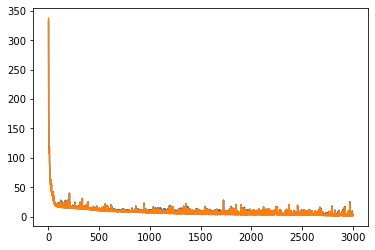

In [21]:
model = Model()
#损失函数
#loss_fn = nn.CrossEntropyLoss()
loss_fn = torch.nn.MSELoss()#损失函数采用常用的均方损失函数

#便于随着训练的进行观察数值的变化
train_loss=[]
test_loss=[]
min_loss=100
max_acc=90

def accury(pred,y):
    return 100-(abs(pred - y)/y*100)

def get_model():
    #获得这个模型
    model = Model()
    #优化函数 优化的是模型所有变量即model.parameters()
    opt = torch.optim.Adam(model.parameters(),lr=0.0005)  #lr=0.0001  #选择使用哪种优化器 761个数据集用这个优化器
    #opt = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3
    return model,opt

model,optim = get_model()

for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = model(x)
        #print(y_pred,y)
        loss = loss_fn(y_pred, y)
        # 梯度置为0
        
        optim.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        optim.step()
    # 不需要进行梯度计算
    with torch.no_grad():
        epoch_loss = loss_fn(model(train_x), train_y).data
        epoch_acc = accury(model(train_x), train_y).numpy()
        epoch_test_loss = loss_fn(model(test_x), test_y).data
        epoch_test_acc = accury(model(test_x), test_y).numpy()
        #print(epoch_test_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
        print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
              'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
        train_loss.append(epoch_loss)
        test_loss.append(epoch_test_loss)
        if epoch_test_loss < min_loss:
            min_loss = epoch_test_loss
            print("min loss epoch:"+str(epoch))
            torch.save(model, 'H:/vamf_model/model_vmaf_10.pth')
            df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
            print(df)
        if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
            max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)
            print("max acc epoch："+str(epoch)+"        max acc："+str(max_acc))
            
print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc))        
#print(model(test_x), test_y)
df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
print(df)

plt.plot(range(1,epochs+1),train_loss,label='train_loss')
plt.plot(range(1,epochs+1),test_loss,label='test_loss')
plt.show()
#torch.save(model, 'H:/vamf_model/model_vmaf.pth')

In [5]:
#epoch:3000,lr:0.0005 基本相同，少部分差别大，非常可以！
#epoch:3000,lr:0.001 基本相差1，可以！

In [16]:
import time

#预测
model = Model()
model=torch.load( 'H:/vamf_model/model_vmaf_10.pth')
model.eval()
df1 = pd.read_excel('E:/研学/实验数据/Bee.xlsx')
df2 = pd.read_excel('E:/研学/实验数据/Jockey.xlsx')
df3 = pd.read_excel('E:/研学/实验数据/Bigmouse.xlsx')
df4 = pd.read_excel('E:/研学/实验数据/Village.xlsx')

df5 = pd.read_excel('E:/研学/实验数据/LOL.xlsx')

N  =[ 'scale', 'sr','contrast','Hue1','Hue3',
   	'Hue5',	'Hue6',	'Saturation','TI','SI']
df1 = df1[N].values
#df2 = df2[N].values
#df3 = df3[N].values
#df4 = df4[N].values
#df5 = df5[N].values

x1 = torch.from_numpy(df1).type(torch.FloatTensor)
#x2 = torch.from_numpy(df2).type(torch.FloatTensor)
#x3 = torch.from_numpy(df3).type(torch.FloatTensor)
#x4 = torch.from_numpy(df4).type(torch.FloatTensor)
#x5 = torch.from_numpy(df5).type(torch.FloatTensor)
pre1 = model(x1)
#pre2 = model(x2)
#pre3 = model(x3)
#pre4 = model(x4)
#pre5 = model(x5)
pre1
#list(pre3.detach().numpy().reshape(-1,900)[0])

tensor([[90.9122],
        [90.3400],
        [89.7678],
        [89.1956],
        [88.3979],
        [86.7989],
        [86.4474],
        [86.4614],
        [86.4949],
        [86.5904],
        [86.6858],
        [86.7812],
        [86.8767],
        [86.9721],
        [87.0675],
        [87.1629],
        [87.2584],
        [87.3538],
        [87.4492],
        [87.5446],
        [87.6401],
        [87.7355],
        [87.8309],
        [87.9263],
        [88.0168],
        [88.1014],
        [88.1860],
        [88.2695],
        [88.3467],
        [88.4029],
        [91.8548],
        [91.3124],
        [90.7700],
        [90.2276],
        [89.6207],
        [88.0535],
        [87.7421],
        [87.7149],
        [87.6877],
        [87.6605],
        [87.6333],
        [87.6061],
        [87.5789],
        [87.5517],
        [87.5464],
        [87.6117],
        [87.6771],
        [87.7424],
        [87.8077],
        [87.8730],
        [87.9384],
        [88.0037],
        [88.

In [17]:
# list转dataframe
df = pd.DataFrame(list(pre5.detach().numpy().reshape(-1,900)[0]), columns=['vmaf'])
# 保存到本地excel
df.to_excel("E:/研学/实验数据/LOL_vmaf.xlsx", index=False)

NameError: name 'pre5' is not defined

In [7]:
import csv
data=pd.read_csv('E:\\PCA\DNN_train\\5%\\feature_psnr_normal.csv')
print(data)
#查看有没有Nan列

FileNotFoundError: [Errno 2] File E:\PCA\DNN_train\5%\feature_psnr_normal.csv does not exist: 'E:\\PCA\\DNN_train\\5%\\feature_psnr_normal.csv'

In [7]:
#批量处理VMAF预测的特征重要性
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from scipy import stats

ACC=[]
for i in range(16,18):
    N=[ 'scale', 'sr', 'keypoint','brightness',
       'contrast','edgeLength','Hue1','Hue2','Hue3',
       'Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation',
       'Value','TI','SI', 'first_frame']
    del N[i]######
    print(N)
    #读数据
    data = pd.read_csv("C:/Users/aqing/Desktop/dog/dog.csv") 
    X = data[N].values
    Y = data.vmaf.values.reshape(-1, 1)
    train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
    print(type(train_x))

    #将数据转换成Tensor LongTensor等价于int64
    train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
    train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
    test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
    test_y = torch.from_numpy(test_y).type(torch.FloatTensor)
    print(test_x.shape)
    points = int(test_x.shape[1])

    #数据只有3805行故batchsize设置8较优
    batch = 8#32
    no_of_batches = len(data)//batch
    epochs = 3000#3000

    #TensorDataset()可以对tensor进行打包即合并
    train_ds = TensorDataset(train_x,train_y)
    #希望模型不关注训练集数据顺序故用乱序
    train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
    test_ds = TensorDataset(test_x,test_y)
    #对测试集不需要用乱序避免工作量增加
    test_dl = DataLoader(test_ds,batch_size=batch)

    #创建模型
    #继承nn.Module这个类并自定义模型
    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.linear1 = nn.Linear(points,points*2)  # 输入是一个点对（x1，x2）,所以我们输入的神经节点是两个
            self.linear2 = nn.Linear(points*2,points*2, bias=True)
            self.linear3 = nn.Linear(points*2,points*2, bias=True)
            self.linear4 = nn.Linear(points*2,points*2, bias=True)
            self.linear5 = nn.Linear(points*2,points, bias=True)
            self.linear6 = nn.Linear(points,1)  # 输出层由于是二分类，所以输出节点是2
        def forward(self, x):
            x = F.relu(self.linear1(x))
            x = F.relu(self.linear2(x))
            x = F.relu(self.linear3(x))
            x = F.relu(self.linear4(x))
            x = F.relu(self.linear5(x))
            c =self.linear6(x)
            #c = F.softmax(self.linear6(x),dim=1)
            return c
    
    model = Model()
    #损失函数
    #loss_fn = nn.CrossEntropyLoss()
    loss_fn = torch.nn.MSELoss()#损失函数采用常用的均方损失函数

    #便于随着训练的进行观察数值的变化
    train_loss=[]
    test_loss=[]
    min_loss=1
    max_acc=1

    def accury(pred,y):
        return 100-(abs(pred - y)/y*100)

    def get_model():
        #获得这个模型
        model = Model()
        #优化函数 优化的是模型所有变量即model.parameters()
        opt = torch.optim.Adam(model.parameters(),lr=0.0005)  #lr=0.0001  #选择使用哪种优化器 761个数据集用这个优化器
        #opt = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3
        return model,opt

    model,optim = get_model()

    for epoch in range(epochs):
        for x,y in train_dl:
            y_pred = model(x)
            #print(y_pred,y)
            loss = loss_fn(y_pred, y)
            # 梯度置为0
        
            optim.zero_grad()
            # 反向传播求解梯度
            loss.backward()
            # 优化
            optim.step()
        # 不需要进行梯度计算
        with torch.no_grad():
            epoch_loss = loss_fn(model(train_x), train_y).data
            epoch_acc = accury(model(train_x), train_y).numpy()
            epoch_test_loss = loss_fn(model(test_x), test_y).data
            epoch_test_acc = accury(model(test_x), test_y).numpy()
            #print(epoch_test_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
                  'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
            train_loss.append(epoch_loss)
            test_loss.append(epoch_test_loss)

            if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
                max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)
                print("max acc epoch："+str(epoch)+"        max acc："+str(max_acc))
            
    print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc))        
    ACC.append(max_acc)
    
print(ACC)
# list转dataframe
df = pd.DataFrame(ACC, columns=['acc'])
# 保存到本地excel
df.to_excel("F:/video_cut/vmaf_acc.xlsx", index=False)

['scale', 'sr', 'keypoint', 'brightness', 'contrast', 'edgeLength', 'Hue1', 'Hue2', 'Hue3', 'Hue4', 'Hue5', 'Hue6', 'Hue7', 'Saturation', 'Value', 'TI', 'first_frame']
<class 'numpy.ndarray'>
torch.Size([603, 17])
epoch:  0 train_loss:  267.369 train_acc:  82.627 test_loss:  261.714 test_acc:  82.927
max acc epoch：0        max acc：82.927
epoch:  1 train_loss:  253.592 train_acc:  81.791 test_loss:  249.006 test_acc:  82.023
epoch:  2 train_loss:  197.057 train_acc:  83.543 test_loss:  192.337 test_acc:  83.674
max acc epoch：2        max acc：83.674
epoch:  3 train_loss:  254.015 train_acc:  83.52 test_loss:  251.667 test_acc:  83.824
max acc epoch：3        max acc：83.824
epoch:  4 train_loss:  246.171 train_acc:  81.756 test_loss:  238.269 test_acc:  82.231
epoch:  5 train_loss:  470.117 train_acc:  74.736 test_loss:  460.727 test_acc:  75.127
epoch:  6 train_loss:  263.219 train_acc:  81.255 test_loss:  254.732 test_acc:  81.7
epoch:  7 train_loss:  182.061 train_acc:  85.658 test_loss

epoch:  84 train_loss:  110.431 train_acc:  88.009 test_loss:  114.937 test_acc:  87.746
epoch:  85 train_loss:  122.064 train_acc:  87.303 test_loss:  124.026 test_acc:  87.187
epoch:  86 train_loss:  116.018 train_acc:  87.452 test_loss:  118.423 test_acc:  87.36
epoch:  87 train_loss:  123.655 train_acc:  87.708 test_loss:  127.203 test_acc:  87.578
epoch:  88 train_loss:  109.606 train_acc:  87.984 test_loss:  114.839 test_acc:  87.746
epoch:  89 train_loss:  134.315 train_acc:  86.722 test_loss:  138.468 test_acc:  86.579
epoch:  90 train_loss:  130.193 train_acc:  87.09 test_loss:  137.85 test_acc:  86.791
epoch:  91 train_loss:  112.757 train_acc:  87.897 test_loss:  118.185 test_acc:  87.666
epoch:  92 train_loss:  121.859 train_acc:  87.288 test_loss:  124.41 test_acc:  87.304
epoch:  93 train_loss:  124.812 train_acc:  86.892 test_loss:  131.733 test_acc:  86.447
epoch:  94 train_loss:  117.468 train_acc:  87.783 test_loss:  121.128 test_acc:  87.711
epoch:  95 train_loss:  1

epoch:  171 train_loss:  128.396 train_acc:  87.117 test_loss:  128.627 test_acc:  87.202
epoch:  172 train_loss:  105.176 train_acc:  88.565 test_loss:  110.198 test_acc:  88.23
epoch:  173 train_loss:  104.081 train_acc:  88.677 test_loss:  108.343 test_acc:  88.511
max acc epoch：173        max acc：88.511
epoch:  174 train_loss:  109.751 train_acc:  88.566 test_loss:  113.54 test_acc:  88.384
epoch:  175 train_loss:  104.947 train_acc:  88.676 test_loss:  108.684 test_acc:  88.444
epoch:  176 train_loss:  109.419 train_acc:  88.074 test_loss:  115.048 test_acc:  87.63
epoch:  177 train_loss:  102.293 train_acc:  88.68 test_loss:  105.551 test_acc:  88.479
epoch:  178 train_loss:  107.799 train_acc:  88.511 test_loss:  109.862 test_acc:  88.432
epoch:  179 train_loss:  123.655 train_acc:  87.156 test_loss:  131.058 test_acc:  86.652
epoch:  180 train_loss:  105.258 train_acc:  88.566 test_loss:  107.743 test_acc:  88.445
epoch:  181 train_loss:  101.687 train_acc:  88.81 test_loss:  1

epoch:  259 train_loss:  101.738 train_acc:  88.596 test_loss:  106.222 test_acc:  88.27
epoch:  260 train_loss:  96.508 train_acc:  89.048 test_loss:  97.797 test_acc:  89.051
epoch:  261 train_loss:  99.953 train_acc:  88.822 test_loss:  101.012 test_acc:  88.765
epoch:  262 train_loss:  99.905 train_acc:  88.645 test_loss:  103.935 test_acc:  88.442
epoch:  263 train_loss:  96.256 train_acc:  89.119 test_loss:  99.494 test_acc:  88.952
epoch:  264 train_loss:  112.538 train_acc:  87.954 test_loss:  116.301 test_acc:  87.824
epoch:  265 train_loss:  102.855 train_acc:  88.719 test_loss:  105.249 test_acc:  88.621
epoch:  266 train_loss:  96.6 train_acc:  88.945 test_loss:  99.135 test_acc:  88.807
epoch:  267 train_loss:  125.167 train_acc:  87.206 test_loss:  128.685 test_acc:  87.204
epoch:  268 train_loss:  94.528 train_acc:  89.237 test_loss:  96.786 test_acc:  89.054
epoch:  269 train_loss:  95.729 train_acc:  89.307 test_loss:  97.991 test_acc:  89.222
max acc epoch：269        

epoch:  348 train_loss:  90.669 train_acc:  89.573 test_loss:  94.212 test_acc:  89.32
epoch:  349 train_loss:  92.251 train_acc:  89.228 test_loss:  94.432 test_acc:  89.131
epoch:  350 train_loss:  89.405 train_acc:  89.751 test_loss:  91.341 test_acc:  89.714
max acc epoch：350        max acc：89.714
epoch:  351 train_loss:  98.069 train_acc:  89.118 test_loss:  101.392 test_acc:  89.003
epoch:  352 train_loss:  102.952 train_acc:  89.018 test_loss:  103.959 test_acc:  89.152
epoch:  353 train_loss:  92.276 train_acc:  89.676 test_loss:  94.723 test_acc:  89.534
epoch:  354 train_loss:  90.291 train_acc:  89.465 test_loss:  92.028 test_acc:  89.409
epoch:  355 train_loss:  91.929 train_acc:  89.625 test_loss:  93.818 test_acc:  89.502
epoch:  356 train_loss:  123.82 train_acc:  87.527 test_loss:  124.721 test_acc:  87.774
epoch:  357 train_loss:  95.317 train_acc:  89.323 test_loss:  97.652 test_acc:  89.313
epoch:  358 train_loss:  106.345 train_acc:  88.704 test_loss:  105.168 test_

epoch:  437 train_loss:  97.482 train_acc:  88.789 test_loss:  99.582 test_acc:  88.778
epoch:  438 train_loss:  86.665 train_acc:  90.108 test_loss:  88.041 test_acc:  90.056
epoch:  439 train_loss:  91.996 train_acc:  89.926 test_loss:  95.494 test_acc:  89.837
epoch:  440 train_loss:  85.615 train_acc:  89.827 test_loss:  87.229 test_acc:  89.776
epoch:  441 train_loss:  88.589 train_acc:  89.946 test_loss:  90.968 test_acc:  89.785
epoch:  442 train_loss:  87.618 train_acc:  90.093 test_loss:  90.038 test_acc:  89.92
epoch:  443 train_loss:  87.476 train_acc:  89.879 test_loss:  90.791 test_acc:  89.755
epoch:  444 train_loss:  89.053 train_acc:  89.871 test_loss:  89.602 test_acc:  89.877
epoch:  445 train_loss:  88.116 train_acc:  90.113 test_loss:  91.384 test_acc:  89.932
epoch:  446 train_loss:  95.729 train_acc:  89.538 test_loss:  96.355 test_acc:  89.526
epoch:  447 train_loss:  84.43 train_acc:  90.188 test_loss:  87.543 test_acc:  90.059
epoch:  448 train_loss:  86.787 tr

epoch:  529 train_loss:  89.17 train_acc:  89.404 test_loss:  92.093 test_acc:  89.28
epoch:  530 train_loss:  81.629 train_acc:  90.402 test_loss:  84.194 test_acc:  90.333
epoch:  531 train_loss:  84.153 train_acc:  90.393 test_loss:  86.336 test_acc:  90.272
epoch:  532 train_loss:  105.19 train_acc:  88.398 test_loss:  106.437 test_acc:  88.413
epoch:  533 train_loss:  86.627 train_acc:  89.784 test_loss:  90.312 test_acc:  89.632
epoch:  534 train_loss:  85.979 train_acc:  89.994 test_loss:  88.669 test_acc:  89.925
epoch:  535 train_loss:  100.788 train_acc:  88.68 test_loss:  104.033 test_acc:  88.539
epoch:  536 train_loss:  91.969 train_acc:  89.933 test_loss:  95.718 test_acc:  89.867
epoch:  537 train_loss:  83.756 train_acc:  90.159 test_loss:  87.289 test_acc:  90.045
epoch:  538 train_loss:  85.053 train_acc:  89.943 test_loss:  89.034 test_acc:  89.691
epoch:  539 train_loss:  82.707 train_acc:  90.391 test_loss:  85.578 test_acc:  90.256
epoch:  540 train_loss:  85.708 

epoch:  621 train_loss:  85.528 train_acc:  90.359 test_loss:  85.832 test_acc:  90.442
epoch:  622 train_loss:  84.38 train_acc:  90.198 test_loss:  84.884 test_acc:  90.238
epoch:  623 train_loss:  91.079 train_acc:  89.835 test_loss:  93.177 test_acc:  89.759
epoch:  624 train_loss:  86.269 train_acc:  90.106 test_loss:  87.576 test_acc:  90.104
epoch:  625 train_loss:  82.969 train_acc:  90.258 test_loss:  87.275 test_acc:  90.019
epoch:  626 train_loss:  80.317 train_acc:  90.604 test_loss:  85.176 test_acc:  90.31
epoch:  627 train_loss:  84.781 train_acc:  90.076 test_loss:  85.696 test_acc:  90.162
epoch:  628 train_loss:  79.782 train_acc:  90.676 test_loss:  83.417 test_acc:  90.486
epoch:  629 train_loss:  89.743 train_acc:  89.738 test_loss:  91.309 test_acc:  89.605
epoch:  630 train_loss:  92.015 train_acc:  89.528 test_loss:  93.747 test_acc:  89.554
epoch:  631 train_loss:  82.827 train_acc:  90.536 test_loss:  86.399 test_acc:  90.37
epoch:  632 train_loss:  85.542 tra

epoch:  713 train_loss:  84.651 train_acc:  90.436 test_loss:  86.732 test_acc:  90.32
epoch:  714 train_loss:  82.182 train_acc:  90.406 test_loss:  85.094 test_acc:  90.281
epoch:  715 train_loss:  89.411 train_acc:  90.331 test_loss:  91.707 test_acc:  90.439
epoch:  716 train_loss:  101.125 train_acc:  89.498 test_loss:  103.927 test_acc:  89.628
epoch:  717 train_loss:  91.125 train_acc:  89.518 test_loss:  93.151 test_acc:  89.596
epoch:  718 train_loss:  79.65 train_acc:  90.772 test_loss:  82.699 test_acc:  90.667
epoch:  719 train_loss:  79.105 train_acc:  90.336 test_loss:  80.902 test_acc:  90.301
epoch:  720 train_loss:  78.235 train_acc:  90.474 test_loss:  80.981 test_acc:  90.373
epoch:  721 train_loss:  83.664 train_acc:  90.235 test_loss:  87.344 test_acc:  90.068
epoch:  722 train_loss:  86.214 train_acc:  89.997 test_loss:  87.865 test_acc:  89.85
epoch:  723 train_loss:  82.114 train_acc:  90.802 test_loss:  84.976 test_acc:  90.694
epoch:  724 train_loss:  81.553 t

epoch:  805 train_loss:  97.994 train_acc:  89.409 test_loss:  97.77 test_acc:  89.486
epoch:  806 train_loss:  95.261 train_acc:  89.151 test_loss:  96.301 test_acc:  89.292
epoch:  807 train_loss:  82.036 train_acc:  90.434 test_loss:  84.59 test_acc:  90.482
epoch:  808 train_loss:  79.588 train_acc:  90.612 test_loss:  81.207 test_acc:  90.664
epoch:  809 train_loss:  91.804 train_acc:  89.971 test_loss:  92.254 test_acc:  90.083
epoch:  810 train_loss:  76.829 train_acc:  90.96 test_loss:  78.622 test_acc:  90.907
epoch:  811 train_loss:  83.065 train_acc:  90.325 test_loss:  85.389 test_acc:  90.424
epoch:  812 train_loss:  85.891 train_acc:  90.243 test_loss:  88.146 test_acc:  90.309
epoch:  813 train_loss:  103.749 train_acc:  89.616 test_loss:  105.605 test_acc:  89.755
epoch:  814 train_loss:  77.546 train_acc:  90.869 test_loss:  80.674 test_acc:  90.807
epoch:  815 train_loss:  77.314 train_acc:  90.967 test_loss:  80.192 test_acc:  90.926
epoch:  816 train_loss:  102.369 

epoch:  898 train_loss:  79.955 train_acc:  90.866 test_loss:  83.528 test_acc:  90.82
epoch:  899 train_loss:  78.875 train_acc:  90.49 test_loss:  81.013 test_acc:  90.483
epoch:  900 train_loss:  83.683 train_acc:  89.864 test_loss:  84.896 test_acc:  89.943
epoch:  901 train_loss:  83.391 train_acc:  90.399 test_loss:  84.716 test_acc:  90.367
epoch:  902 train_loss:  86.323 train_acc:  90.689 test_loss:  89.041 test_acc:  90.832
epoch:  903 train_loss:  77.111 train_acc:  91.034 test_loss:  78.99 test_acc:  91.025
epoch:  904 train_loss:  85.835 train_acc:  90.742 test_loss:  89.392 test_acc:  90.734
epoch:  905 train_loss:  78.914 train_acc:  90.792 test_loss:  81.239 test_acc:  90.697
epoch:  906 train_loss:  91.621 train_acc:  89.086 test_loss:  95.237 test_acc:  88.854
epoch:  907 train_loss:  90.047 train_acc:  89.961 test_loss:  91.813 test_acc:  89.902
epoch:  908 train_loss:  75.053 train_acc:  91.008 test_loss:  77.892 test_acc:  90.85
epoch:  909 train_loss:  82.63 train

epoch:  992 train_loss:  83.6 train_acc:  90.238 test_loss:  84.771 test_acc:  90.296
epoch:  993 train_loss:  79.351 train_acc:  90.482 test_loss:  81.749 test_acc:  90.434
epoch:  994 train_loss:  77.047 train_acc:  91.009 test_loss:  80.639 test_acc:  90.82
epoch:  995 train_loss:  76.77 train_acc:  90.979 test_loss:  79.847 test_acc:  90.903
epoch:  996 train_loss:  82.347 train_acc:  90.338 test_loss:  84.176 test_acc:  90.366
epoch:  997 train_loss:  74.466 train_acc:  91.161 test_loss:  77.891 test_acc:  91.039
epoch:  998 train_loss:  76.913 train_acc:  91.107 test_loss:  78.702 test_acc:  91.016
epoch:  999 train_loss:  77.512 train_acc:  90.737 test_loss:  80.441 test_acc:  90.658
epoch:  1000 train_loss:  76.493 train_acc:  90.941 test_loss:  78.253 test_acc:  90.888
epoch:  1001 train_loss:  74.636 train_acc:  91.138 test_loss:  78.535 test_acc:  90.938
epoch:  1002 train_loss:  75.589 train_acc:  91.04 test_loss:  79.136 test_acc:  90.87
epoch:  1003 train_loss:  87.01 tra

epoch:  1085 train_loss:  79.412 train_acc:  90.553 test_loss:  81.947 test_acc:  90.467
epoch:  1086 train_loss:  85.382 train_acc:  90.01 test_loss:  88.282 test_acc:  89.888
epoch:  1087 train_loss:  84.207 train_acc:  90.614 test_loss:  86.958 test_acc:  90.649
epoch:  1088 train_loss:  86.553 train_acc:  89.966 test_loss:  87.473 test_acc:  90.07
epoch:  1089 train_loss:  78.808 train_acc:  90.816 test_loss:  80.78 test_acc:  90.759
epoch:  1090 train_loss:  81.338 train_acc:  90.402 test_loss:  83.982 test_acc:  90.317
epoch:  1091 train_loss:  76.985 train_acc:  90.782 test_loss:  80.174 test_acc:  90.665
epoch:  1092 train_loss:  75.987 train_acc:  90.87 test_loss:  78.427 test_acc:  90.806
epoch:  1093 train_loss:  129.216 train_acc:  87.143 test_loss:  129.319 test_acc:  87.245
epoch:  1094 train_loss:  78.061 train_acc:  90.747 test_loss:  81.252 test_acc:  90.654
epoch:  1095 train_loss:  79.199 train_acc:  90.647 test_loss:  81.936 test_acc:  90.626
epoch:  1096 train_loss

epoch:  1178 train_loss:  79.564 train_acc:  90.674 test_loss:  82.525 test_acc:  90.623
epoch:  1179 train_loss:  82.116 train_acc:  89.97 test_loss:  83.625 test_acc:  89.929
epoch:  1180 train_loss:  97.023 train_acc:  90.181 test_loss:  99.963 test_acc:  90.158
epoch:  1181 train_loss:  79.774 train_acc:  90.619 test_loss:  81.923 test_acc:  90.49
epoch:  1182 train_loss:  88.093 train_acc:  90.072 test_loss:  89.583 test_acc:  89.976
epoch:  1183 train_loss:  75.675 train_acc:  91.033 test_loss:  78.412 test_acc:  90.826
epoch:  1184 train_loss:  76.4 train_acc:  90.917 test_loss:  78.937 test_acc:  90.753
epoch:  1185 train_loss:  76.829 train_acc:  91.09 test_loss:  78.852 test_acc:  90.993
epoch:  1186 train_loss:  91.991 train_acc:  89.745 test_loss:  92.591 test_acc:  89.781
epoch:  1187 train_loss:  77.134 train_acc:  91.046 test_loss:  79.477 test_acc:  91.017
epoch:  1188 train_loss:  77.467 train_acc:  90.959 test_loss:  80.448 test_acc:  90.845
epoch:  1189 train_loss:  

epoch:  1269 train_loss:  78.844 train_acc:  90.659 test_loss:  82.207 test_acc:  90.488
epoch:  1270 train_loss:  74.535 train_acc:  91.288 test_loss:  76.316 test_acc:  91.222
epoch:  1271 train_loss:  79.953 train_acc:  90.255 test_loss:  83.299 test_acc:  89.99
epoch:  1272 train_loss:  77.714 train_acc:  90.551 test_loss:  79.877 test_acc:  90.602
epoch:  1273 train_loss:  87.153 train_acc:  90.096 test_loss:  88.06 test_acc:  90.155
epoch:  1274 train_loss:  74.941 train_acc:  90.959 test_loss:  78.344 test_acc:  90.773
epoch:  1275 train_loss:  89.277 train_acc:  89.502 test_loss:  91.816 test_acc:  89.323
epoch:  1276 train_loss:  77.12 train_acc:  91.097 test_loss:  79.34 test_acc:  90.965
epoch:  1277 train_loss:  76.06 train_acc:  91.0 test_loss:  79.418 test_acc:  90.94
epoch:  1278 train_loss:  76.463 train_acc:  90.984 test_loss:  78.96 test_acc:  90.991
epoch:  1279 train_loss:  108.248 train_acc:  89.138 test_loss:  108.737 test_acc:  89.326
epoch:  1280 train_loss:  81

epoch:  1362 train_loss:  82.037 train_acc:  90.781 test_loss:  84.602 test_acc:  90.797
epoch:  1363 train_loss:  75.828 train_acc:  90.779 test_loss:  78.987 test_acc:  90.724
epoch:  1364 train_loss:  78.607 train_acc:  90.724 test_loss:  79.961 test_acc:  90.663
epoch:  1365 train_loss:  78.061 train_acc:  91.006 test_loss:  80.655 test_acc:  91.008
epoch:  1366 train_loss:  84.904 train_acc:  89.31 test_loss:  86.783 test_acc:  89.224
epoch:  1367 train_loss:  75.108 train_acc:  91.141 test_loss:  77.853 test_acc:  90.99
epoch:  1368 train_loss:  79.441 train_acc:  90.802 test_loss:  81.456 test_acc:  90.795
epoch:  1369 train_loss:  88.679 train_acc:  90.138 test_loss:  89.037 test_acc:  90.162
epoch:  1370 train_loss:  88.135 train_acc:  90.071 test_loss:  90.241 test_acc:  90.116
epoch:  1371 train_loss:  88.315 train_acc:  90.339 test_loss:  89.492 test_acc:  90.411
epoch:  1372 train_loss:  77.213 train_acc:  90.537 test_loss:  79.43 test_acc:  90.573
epoch:  1373 train_loss:

epoch:  1455 train_loss:  72.459 train_acc:  91.383 test_loss:  75.795 test_acc:  91.196
epoch:  1456 train_loss:  77.604 train_acc:  90.507 test_loss:  81.301 test_acc:  90.293
epoch:  1457 train_loss:  78.603 train_acc:  90.864 test_loss:  80.321 test_acc:  90.729
epoch:  1458 train_loss:  75.15 train_acc:  91.095 test_loss:  76.678 test_acc:  91.083
epoch:  1459 train_loss:  118.599 train_acc:  87.698 test_loss:  118.957 test_acc:  87.873
epoch:  1460 train_loss:  76.376 train_acc:  91.089 test_loss:  78.554 test_acc:  91.09
epoch:  1461 train_loss:  72.385 train_acc:  91.095 test_loss:  74.923 test_acc:  91.052
epoch:  1462 train_loss:  98.378 train_acc:  89.213 test_loss:  99.702 test_acc:  89.316
epoch:  1463 train_loss:  78.284 train_acc:  91.127 test_loss:  79.791 test_acc:  91.126
epoch:  1464 train_loss:  91.259 train_acc:  89.883 test_loss:  92.777 test_acc:  90.011
epoch:  1465 train_loss:  74.737 train_acc:  91.307 test_loss:  76.957 test_acc:  91.222
epoch:  1466 train_lo

epoch:  1548 train_loss:  72.629 train_acc:  91.314 test_loss:  75.083 test_acc:  91.246
epoch:  1549 train_loss:  78.098 train_acc:  91.127 test_loss:  79.654 test_acc:  91.126
epoch:  1550 train_loss:  84.387 train_acc:  90.502 test_loss:  85.916 test_acc:  90.476
epoch:  1551 train_loss:  75.271 train_acc:  91.246 test_loss:  77.511 test_acc:  91.172
epoch:  1552 train_loss:  75.401 train_acc:  91.204 test_loss:  78.019 test_acc:  91.055
epoch:  1553 train_loss:  73.514 train_acc:  91.358 test_loss:  76.294 test_acc:  91.271
epoch:  1554 train_loss:  91.539 train_acc:  89.794 test_loss:  92.572 test_acc:  89.836
epoch:  1555 train_loss:  90.692 train_acc:  89.735 test_loss:  92.013 test_acc:  89.676
epoch:  1556 train_loss:  71.779 train_acc:  91.424 test_loss:  74.577 test_acc:  91.287
epoch:  1557 train_loss:  90.972 train_acc:  90.342 test_loss:  89.428 test_acc:  90.633
epoch:  1558 train_loss:  82.918 train_acc:  90.529 test_loss:  84.552 test_acc:  90.443
epoch:  1559 train_lo

epoch:  1641 train_loss:  101.995 train_acc:  89.36 test_loss:  100.437 test_acc:  89.636
epoch:  1642 train_loss:  77.783 train_acc:  90.715 test_loss:  79.938 test_acc:  90.632
epoch:  1643 train_loss:  75.649 train_acc:  91.163 test_loss:  78.327 test_acc:  91.028
epoch:  1644 train_loss:  71.802 train_acc:  91.357 test_loss:  74.715 test_acc:  91.239
epoch:  1645 train_loss:  85.118 train_acc:  90.07 test_loss:  87.499 test_acc:  90.081
epoch:  1646 train_loss:  78.684 train_acc:  91.021 test_loss:  80.751 test_acc:  90.941
epoch:  1647 train_loss:  89.703 train_acc:  90.401 test_loss:  92.726 test_acc:  90.421
epoch:  1648 train_loss:  73.971 train_acc:  91.293 test_loss:  76.215 test_acc:  91.238
epoch:  1649 train_loss:  79.859 train_acc:  90.717 test_loss:  81.633 test_acc:  90.625
epoch:  1650 train_loss:  79.802 train_acc:  90.612 test_loss:  84.073 test_acc:  90.486
epoch:  1651 train_loss:  104.267 train_acc:  88.678 test_loss:  104.139 test_acc:  88.793
epoch:  1652 train_

epoch:  1734 train_loss:  71.199 train_acc:  91.575 test_loss:  74.807 test_acc:  91.534
max acc epoch：1734        max acc：91.534
epoch:  1735 train_loss:  72.289 train_acc:  91.257 test_loss:  75.486 test_acc:  91.104
epoch:  1736 train_loss:  82.518 train_acc:  89.945 test_loss:  86.342 test_acc:  89.71
epoch:  1737 train_loss:  88.997 train_acc:  90.46 test_loss:  91.06 test_acc:  90.511
epoch:  1738 train_loss:  83.027 train_acc:  90.042 test_loss:  86.534 test_acc:  89.844
epoch:  1739 train_loss:  72.038 train_acc:  91.363 test_loss:  75.501 test_acc:  91.138
epoch:  1740 train_loss:  81.785 train_acc:  90.391 test_loss:  85.286 test_acc:  90.156
epoch:  1741 train_loss:  82.441 train_acc:  90.616 test_loss:  84.414 test_acc:  90.651
epoch:  1742 train_loss:  71.28 train_acc:  91.521 test_loss:  75.023 test_acc:  91.373
epoch:  1743 train_loss:  71.266 train_acc:  91.418 test_loss:  74.535 test_acc:  91.289
epoch:  1744 train_loss:  76.083 train_acc:  91.008 test_loss:  79.349 te

epoch:  1826 train_loss:  104.141 train_acc:  88.646 test_loss:  103.908 test_acc:  88.766
epoch:  1827 train_loss:  81.214 train_acc:  90.344 test_loss:  83.732 test_acc:  90.331
epoch:  1828 train_loss:  76.676 train_acc:  90.941 test_loss:  79.527 test_acc:  90.935
epoch:  1829 train_loss:  76.516 train_acc:  90.873 test_loss:  79.778 test_acc:  90.815
epoch:  1830 train_loss:  77.178 train_acc:  90.758 test_loss:  80.138 test_acc:  90.693
epoch:  1831 train_loss:  74.367 train_acc:  91.203 test_loss:  77.248 test_acc:  91.021
epoch:  1832 train_loss:  71.837 train_acc:  91.479 test_loss:  74.215 test_acc:  91.342
epoch:  1833 train_loss:  238.124 train_acc:  83.987 test_loss:  212.749 test_acc:  84.547
epoch:  1834 train_loss:  71.903 train_acc:  91.358 test_loss:  75.558 test_acc:  91.237
epoch:  1835 train_loss:  73.115 train_acc:  91.234 test_loss:  76.365 test_acc:  91.134
epoch:  1836 train_loss:  81.407 train_acc:  90.456 test_loss:  82.846 test_acc:  90.417
epoch:  1837 trai

epoch:  1919 train_loss:  72.948 train_acc:  91.324 test_loss:  75.069 test_acc:  91.164
epoch:  1920 train_loss:  73.983 train_acc:  91.334 test_loss:  76.666 test_acc:  91.181
epoch:  1921 train_loss:  77.107 train_acc:  90.535 test_loss:  80.414 test_acc:  90.368
epoch:  1922 train_loss:  76.787 train_acc:  90.986 test_loss:  78.817 test_acc:  90.899
epoch:  1923 train_loss:  73.171 train_acc:  91.289 test_loss:  75.142 test_acc:  91.197
epoch:  1924 train_loss:  74.661 train_acc:  90.826 test_loss:  75.908 test_acc:  90.863
epoch:  1925 train_loss:  72.255 train_acc:  91.384 test_loss:  75.807 test_acc:  91.129
epoch:  1926 train_loss:  79.313 train_acc:  90.921 test_loss:  81.097 test_acc:  90.834
epoch:  1927 train_loss:  69.476 train_acc:  91.425 test_loss:  72.149 test_acc:  91.294
epoch:  1928 train_loss:  77.633 train_acc:  90.909 test_loss:  80.084 test_acc:  90.717
epoch:  1929 train_loss:  70.573 train_acc:  91.422 test_loss:  73.435 test_acc:  91.321
epoch:  1930 train_lo

epoch:  2011 train_loss:  71.94 train_acc:  91.309 test_loss:  73.699 test_acc:  91.264
epoch:  2012 train_loss:  78.948 train_acc:  90.918 test_loss:  80.362 test_acc:  90.875
epoch:  2013 train_loss:  69.839 train_acc:  91.613 test_loss:  73.622 test_acc:  91.393
epoch:  2014 train_loss:  74.215 train_acc:  91.075 test_loss:  76.638 test_acc:  91.122
epoch:  2015 train_loss:  71.414 train_acc:  91.453 test_loss:  74.477 test_acc:  91.331
epoch:  2016 train_loss:  75.839 train_acc:  91.179 test_loss:  78.577 test_acc:  91.207
epoch:  2017 train_loss:  73.807 train_acc:  91.337 test_loss:  75.211 test_acc:  91.328
epoch:  2018 train_loss:  70.659 train_acc:  91.343 test_loss:  72.672 test_acc:  91.322
epoch:  2019 train_loss:  70.201 train_acc:  91.274 test_loss:  72.616 test_acc:  91.207
epoch:  2020 train_loss:  69.181 train_acc:  91.532 test_loss:  73.138 test_acc:  91.312
epoch:  2021 train_loss:  69.652 train_acc:  91.404 test_loss:  72.756 test_acc:  91.302
epoch:  2022 train_los

epoch:  2104 train_loss:  76.845 train_acc:  90.547 test_loss:  78.291 test_acc:  90.565
epoch:  2105 train_loss:  70.29 train_acc:  91.666 test_loss:  72.594 test_acc:  91.547
epoch:  2106 train_loss:  94.041 train_acc:  90.418 test_loss:  95.957 test_acc:  90.549
epoch:  2107 train_loss:  79.31 train_acc:  90.79 test_loss:  81.606 test_acc:  90.765
epoch:  2108 train_loss:  80.807 train_acc:  90.693 test_loss:  82.657 test_acc:  90.738
epoch:  2109 train_loss:  71.466 train_acc:  91.478 test_loss:  75.357 test_acc:  91.347
epoch:  2110 train_loss:  76.711 train_acc:  90.685 test_loss:  79.048 test_acc:  90.66
epoch:  2111 train_loss:  82.493 train_acc:  90.132 test_loss:  83.841 test_acc:  90.136
epoch:  2112 train_loss:  74.104 train_acc:  91.403 test_loss:  77.455 test_acc:  91.391
epoch:  2113 train_loss:  73.162 train_acc:  91.186 test_loss:  75.899 test_acc:  91.196
epoch:  2114 train_loss:  69.568 train_acc:  91.585 test_loss:  72.582 test_acc:  91.449
epoch:  2115 train_loss: 

epoch:  2195 train_loss:  70.166 train_acc:  91.343 test_loss:  72.956 test_acc:  91.266
epoch:  2196 train_loss:  74.842 train_acc:  91.208 test_loss:  78.185 test_acc:  90.959
epoch:  2197 train_loss:  75.933 train_acc:  90.993 test_loss:  79.846 test_acc:  90.928
epoch:  2198 train_loss:  71.19 train_acc:  91.241 test_loss:  73.348 test_acc:  91.165
epoch:  2199 train_loss:  75.47 train_acc:  90.955 test_loss:  78.378 test_acc:  90.882
epoch:  2200 train_loss:  77.425 train_acc:  90.906 test_loss:  79.648 test_acc:  90.788
epoch:  2201 train_loss:  72.993 train_acc:  91.353 test_loss:  74.783 test_acc:  91.35
epoch:  2202 train_loss:  74.781 train_acc:  91.122 test_loss:  78.169 test_acc:  91.097
epoch:  2203 train_loss:  71.375 train_acc:  91.488 test_loss:  73.215 test_acc:  91.35
epoch:  2204 train_loss:  70.737 train_acc:  91.36 test_loss:  72.498 test_acc:  91.316
epoch:  2205 train_loss:  76.435 train_acc:  91.169 test_loss:  77.901 test_acc:  91.187
epoch:  2206 train_loss:  

epoch:  2288 train_loss:  77.233 train_acc:  91.294 test_loss:  79.532 test_acc:  91.214
epoch:  2289 train_loss:  81.716 train_acc:  90.891 test_loss:  82.111 test_acc:  90.97
epoch:  2290 train_loss:  67.599 train_acc:  91.72 test_loss:  70.663 test_acc:  91.657
epoch:  2291 train_loss:  73.645 train_acc:  91.364 test_loss:  75.928 test_acc:  91.239
epoch:  2292 train_loss:  69.347 train_acc:  91.692 test_loss:  72.542 test_acc:  91.504
epoch:  2293 train_loss:  74.234 train_acc:  90.827 test_loss:  75.702 test_acc:  90.974
epoch:  2294 train_loss:  69.571 train_acc:  91.388 test_loss:  72.949 test_acc:  91.208
epoch:  2295 train_loss:  69.822 train_acc:  91.242 test_loss:  72.435 test_acc:  91.22
epoch:  2296 train_loss:  78.432 train_acc:  90.844 test_loss:  80.758 test_acc:  90.707
epoch:  2297 train_loss:  70.482 train_acc:  91.052 test_loss:  72.661 test_acc:  91.076
epoch:  2298 train_loss:  69.609 train_acc:  91.555 test_loss:  72.382 test_acc:  91.445
epoch:  2299 train_loss:

epoch:  2381 train_loss:  77.422 train_acc:  91.066 test_loss:  78.262 test_acc:  91.146
epoch:  2382 train_loss:  91.422 train_acc:  90.066 test_loss:  93.563 test_acc:  90.239
epoch:  2383 train_loss:  70.87 train_acc:  91.387 test_loss:  74.277 test_acc:  91.32
epoch:  2384 train_loss:  68.258 train_acc:  91.72 test_loss:  71.563 test_acc:  91.573
epoch:  2385 train_loss:  78.952 train_acc:  91.062 test_loss:  82.037 test_acc:  91.071
epoch:  2386 train_loss:  70.414 train_acc:  91.277 test_loss:  72.96 test_acc:  91.322
epoch:  2387 train_loss:  72.877 train_acc:  91.498 test_loss:  75.119 test_acc:  91.467
epoch:  2388 train_loss:  70.833 train_acc:  91.301 test_loss:  73.356 test_acc:  91.23
epoch:  2389 train_loss:  70.387 train_acc:  91.565 test_loss:  72.166 test_acc:  91.604
epoch:  2390 train_loss:  138.44 train_acc:  86.668 test_loss:  134.763 test_acc:  86.934
epoch:  2391 train_loss:  67.252 train_acc:  91.786 test_loss:  70.247 test_acc:  91.67
epoch:  2392 train_loss:  

epoch:  2474 train_loss:  69.355 train_acc:  91.673 test_loss:  71.885 test_acc:  91.569
epoch:  2475 train_loss:  72.659 train_acc:  91.427 test_loss:  74.176 test_acc:  91.359
epoch:  2476 train_loss:  67.782 train_acc:  91.634 test_loss:  70.934 test_acc:  91.504
epoch:  2477 train_loss:  87.104 train_acc:  90.252 test_loss:  88.543 test_acc:  90.259
epoch:  2478 train_loss:  74.744 train_acc:  90.66 test_loss:  78.613 test_acc:  90.4
epoch:  2479 train_loss:  73.265 train_acc:  91.026 test_loss:  76.339 test_acc:  90.82
epoch:  2480 train_loss:  67.98 train_acc:  91.671 test_loss:  70.483 test_acc:  91.642
epoch:  2481 train_loss:  73.483 train_acc:  91.376 test_loss:  76.408 test_acc:  91.369
epoch:  2482 train_loss:  71.576 train_acc:  91.498 test_loss:  73.468 test_acc:  91.499
epoch:  2483 train_loss:  66.077 train_acc:  91.794 test_loss:  69.081 test_acc:  91.681
epoch:  2484 train_loss:  83.467 train_acc:  90.487 test_loss:  83.589 test_acc:  90.66
epoch:  2485 train_loss:  9

epoch:  2567 train_loss:  69.086 train_acc:  91.539 test_loss:  72.448 test_acc:  91.447
epoch:  2568 train_loss:  80.53 train_acc:  90.399 test_loss:  82.482 test_acc:  90.466
epoch:  2569 train_loss:  76.451 train_acc:  91.454 test_loss:  79.975 test_acc:  91.357
epoch:  2570 train_loss:  82.493 train_acc:  90.912 test_loss:  84.436 test_acc:  90.928
epoch:  2571 train_loss:  93.743 train_acc:  89.989 test_loss:  94.792 test_acc:  90.108
epoch:  2572 train_loss:  92.233 train_acc:  90.053 test_loss:  92.723 test_acc:  90.143
epoch:  2573 train_loss:  69.726 train_acc:  91.66 test_loss:  73.143 test_acc:  91.488
epoch:  2574 train_loss:  81.237 train_acc:  90.308 test_loss:  83.194 test_acc:  90.348
epoch:  2575 train_loss:  78.652 train_acc:  91.026 test_loss:  79.291 test_acc:  91.114
epoch:  2576 train_loss:  67.574 train_acc:  91.778 test_loss:  70.376 test_acc:  91.717
epoch:  2577 train_loss:  76.146 train_acc:  91.245 test_loss:  77.634 test_acc:  91.251
epoch:  2578 train_loss

epoch:  2659 train_loss:  104.77 train_acc:  89.554 test_loss:  102.566 test_acc:  89.898
epoch:  2660 train_loss:  64.745 train_acc:  91.883 test_loss:  67.612 test_acc:  91.823
epoch:  2661 train_loss:  82.726 train_acc:  90.852 test_loss:  84.94 test_acc:  90.988
epoch:  2662 train_loss:  63.685 train_acc:  91.84 test_loss:  66.932 test_acc:  91.772
epoch:  2663 train_loss:  65.698 train_acc:  91.836 test_loss:  67.882 test_acc:  91.779
epoch:  2664 train_loss:  71.082 train_acc:  91.009 test_loss:  72.876 test_acc:  90.959
epoch:  2665 train_loss:  81.534 train_acc:  90.803 test_loss:  83.174 test_acc:  90.81
epoch:  2666 train_loss:  69.374 train_acc:  91.862 test_loss:  72.129 test_acc:  91.728
epoch:  2667 train_loss:  81.233 train_acc:  91.107 test_loss:  83.904 test_acc:  91.222
epoch:  2668 train_loss:  68.631 train_acc:  91.74 test_loss:  68.965 test_acc:  91.747
epoch:  2669 train_loss:  75.18 train_acc:  91.309 test_loss:  77.881 test_acc:  91.356
epoch:  2670 train_loss: 

epoch:  2751 train_loss:  93.208 train_acc:  90.319 test_loss:  95.482 test_acc:  90.429
epoch:  2752 train_loss:  68.668 train_acc:  91.656 test_loss:  71.259 test_acc:  91.543
epoch:  2753 train_loss:  67.465 train_acc:  91.821 test_loss:  70.152 test_acc:  91.739
epoch:  2754 train_loss:  64.638 train_acc:  91.937 test_loss:  67.408 test_acc:  91.808
epoch:  2755 train_loss:  72.084 train_acc:  91.113 test_loss:  74.877 test_acc:  91.095
epoch:  2756 train_loss:  65.19 train_acc:  91.95 test_loss:  68.689 test_acc:  91.828
epoch:  2757 train_loss:  70.267 train_acc:  91.556 test_loss:  72.408 test_acc:  91.457
epoch:  2758 train_loss:  77.291 train_acc:  90.628 test_loss:  79.593 test_acc:  90.507
epoch:  2759 train_loss:  67.805 train_acc:  91.492 test_loss:  70.312 test_acc:  91.529
epoch:  2760 train_loss:  64.576 train_acc:  91.901 test_loss:  67.979 test_acc:  91.727
epoch:  2761 train_loss:  70.986 train_acc:  91.161 test_loss:  73.883 test_acc:  91.114
epoch:  2762 train_loss

epoch:  2844 train_loss:  72.366 train_acc:  90.627 test_loss:  74.756 test_acc:  90.478
epoch:  2845 train_loss:  77.605 train_acc:  90.984 test_loss:  80.248 test_acc:  91.067
epoch:  2846 train_loss:  73.779 train_acc:  90.512 test_loss:  76.064 test_acc:  90.526
epoch:  2847 train_loss:  70.209 train_acc:  91.602 test_loss:  71.77 test_acc:  91.576
epoch:  2848 train_loss:  70.582 train_acc:  91.722 test_loss:  72.879 test_acc:  91.647
epoch:  2849 train_loss:  67.791 train_acc:  91.743 test_loss:  70.411 test_acc:  91.606
epoch:  2850 train_loss:  64.894 train_acc:  91.937 test_loss:  67.688 test_acc:  91.788
epoch:  2851 train_loss:  80.917 train_acc:  90.833 test_loss:  81.169 test_acc:  90.987
epoch:  2852 train_loss:  69.807 train_acc:  91.68 test_loss:  73.353 test_acc:  91.645
epoch:  2853 train_loss:  67.814 train_acc:  91.381 test_loss:  70.616 test_acc:  91.3
epoch:  2854 train_loss:  69.959 train_acc:  91.437 test_loss:  72.029 test_acc:  91.479
epoch:  2855 train_loss: 

epoch:  2936 train_loss:  72.37 train_acc:  91.532 test_loss:  73.93 test_acc:  91.479
epoch:  2937 train_loss:  80.197 train_acc:  90.09 test_loss:  82.952 test_acc:  89.953
epoch:  2938 train_loss:  76.879 train_acc:  91.459 test_loss:  80.143 test_acc:  91.471
epoch:  2939 train_loss:  65.908 train_acc:  91.6 test_loss:  68.821 test_acc:  91.543
epoch:  2940 train_loss:  67.322 train_acc:  91.338 test_loss:  70.016 test_acc:  91.335
epoch:  2941 train_loss:  70.847 train_acc:  91.531 test_loss:  72.023 test_acc:  91.555
epoch:  2942 train_loss:  65.273 train_acc:  91.916 test_loss:  67.329 test_acc:  91.839
epoch:  2943 train_loss:  78.438 train_acc:  90.693 test_loss:  80.192 test_acc:  90.668
epoch:  2944 train_loss:  78.385 train_acc:  90.839 test_loss:  79.321 test_acc:  90.848
epoch:  2945 train_loss:  71.665 train_acc:  90.978 test_loss:  73.722 test_acc:  91.036
epoch:  2946 train_loss:  85.565 train_acc:  89.898 test_loss:  87.951 test_acc:  89.86
epoch:  2947 train_loss:  7

epoch:  23 train_loss:  165.591 train_acc:  85.961 test_loss:  161.025 test_acc:  86.111
epoch:  24 train_loss:  128.286 train_acc:  86.962 test_loss:  128.926 test_acc:  86.969
epoch:  25 train_loss:  116.28 train_acc:  87.602 test_loss:  121.07 test_acc:  87.249
max acc epoch：25        max acc：87.249
epoch:  26 train_loss:  125.163 train_acc:  87.452 test_loss:  127.287 test_acc:  87.325
max acc epoch：26        max acc：87.325
epoch:  27 train_loss:  212.272 train_acc:  85.434 test_loss:  186.645 test_acc:  85.866
epoch:  28 train_loss:  151.116 train_acc:  87.218 test_loss:  153.773 test_acc:  87.161
epoch:  29 train_loss:  247.708 train_acc:  83.602 test_loss:  213.267 test_acc:  84.167
epoch:  30 train_loss:  1632.857 train_acc:  60.914 test_loss:  1606.273 test_acc:  62.005
epoch:  31 train_loss:  211.354 train_acc:  84.291 test_loss:  195.428 test_acc:  84.654
epoch:  32 train_loss:  117.299 train_acc:  87.557 test_loss:  120.555 test_acc:  87.256
epoch:  33 train_loss:  125.419 

epoch:  112 train_loss:  108.13 train_acc:  87.952 test_loss:  110.228 test_acc:  87.823
epoch:  113 train_loss:  116.126 train_acc:  87.771 test_loss:  116.404 test_acc:  87.86
epoch:  114 train_loss:  520.458 train_acc:  78.16 test_loss:  482.536 test_acc:  79.088
epoch:  115 train_loss:  112.815 train_acc:  87.596 test_loss:  118.231 test_acc:  87.261
epoch:  116 train_loss:  107.173 train_acc:  88.258 test_loss:  109.379 test_acc:  88.16
max acc epoch：116        max acc：88.16
epoch:  117 train_loss:  117.304 train_acc:  87.733 test_loss:  119.38 test_acc:  87.652
epoch:  118 train_loss:  241.29 train_acc:  85.437 test_loss:  203.204 test_acc:  86.254
epoch:  119 train_loss:  110.342 train_acc:  88.073 test_loss:  111.343 test_acc:  88.108
epoch:  120 train_loss:  117.61 train_acc:  88.02 test_loss:  122.707 test_acc:  87.834
epoch:  121 train_loss:  105.992 train_acc:  88.2 test_loss:  110.118 test_acc:  88.024
epoch:  122 train_loss:  105.985 train_acc:  88.277 test_loss:  109.093

epoch:  202 train_loss:  104.912 train_acc:  88.565 test_loss:  106.096 test_acc:  88.522
epoch:  203 train_loss:  110.325 train_acc:  88.145 test_loss:  111.95 test_acc:  88.038
epoch:  204 train_loss:  104.392 train_acc:  88.462 test_loss:  106.031 test_acc:  88.395
epoch:  205 train_loss:  115.797 train_acc:  87.603 test_loss:  116.78 test_acc:  87.495
epoch:  206 train_loss:  103.652 train_acc:  88.605 test_loss:  104.159 test_acc:  88.599
max acc epoch：206        max acc：88.599
epoch:  207 train_loss:  102.463 train_acc:  88.718 test_loss:  104.192 test_acc:  88.69
max acc epoch：207        max acc：88.69
epoch:  208 train_loss:  108.1 train_acc:  87.98 test_loss:  110.413 test_acc:  87.902
epoch:  209 train_loss:  107.203 train_acc:  88.12 test_loss:  109.186 test_acc:  88.073
epoch:  210 train_loss:  101.197 train_acc:  88.571 test_loss:  102.638 test_acc:  88.522
epoch:  211 train_loss:  105.082 train_acc:  88.605 test_loss:  107.407 test_acc:  88.449
epoch:  212 train_loss:  102

epoch:  290 train_loss:  103.764 train_acc:  88.702 test_loss:  106.53 test_acc:  88.55
epoch:  291 train_loss:  97.081 train_acc:  89.101 test_loss:  98.429 test_acc:  89.156
max acc epoch：291        max acc：89.156
epoch:  292 train_loss:  99.455 train_acc:  89.125 test_loss:  101.484 test_acc:  89.135
epoch:  293 train_loss:  124.662 train_acc:  87.822 test_loss:  125.806 test_acc:  87.956
epoch:  294 train_loss:  97.292 train_acc:  89.048 test_loss:  96.939 test_acc:  89.126
epoch:  295 train_loss:  98.128 train_acc:  89.118 test_loss:  100.237 test_acc:  89.103
epoch:  296 train_loss:  110.809 train_acc:  87.767 test_loss:  110.69 test_acc:  87.786
epoch:  297 train_loss:  96.315 train_acc:  89.129 test_loss:  97.661 test_acc:  89.131
epoch:  298 train_loss:  99.497 train_acc:  89.164 test_loss:  100.928 test_acc:  89.226
max acc epoch：298        max acc：89.226
epoch:  299 train_loss:  106.887 train_acc:  89.068 test_loss:  110.257 test_acc:  89.055
epoch:  300 train_loss:  105.92 

epoch:  380 train_loss:  97.536 train_acc:  89.421 test_loss:  98.193 test_acc:  89.538
max acc epoch：380        max acc：89.538
epoch:  381 train_loss:  98.155 train_acc:  89.188 test_loss:  98.419 test_acc:  89.208
epoch:  382 train_loss:  95.098 train_acc:  89.327 test_loss:  95.589 test_acc:  89.332
epoch:  383 train_loss:  98.792 train_acc:  88.826 test_loss:  98.478 test_acc:  88.91
epoch:  384 train_loss:  91.4 train_acc:  89.716 test_loss:  93.238 test_acc:  89.673
max acc epoch：384        max acc：89.673
epoch:  385 train_loss:  91.04 train_acc:  89.639 test_loss:  92.62 test_acc:  89.645
epoch:  386 train_loss:  98.016 train_acc:  88.772 test_loss:  98.101 test_acc:  88.814
epoch:  387 train_loss:  93.148 train_acc:  89.541 test_loss:  93.755 test_acc:  89.654
epoch:  388 train_loss:  94.52 train_acc:  89.016 test_loss:  96.079 test_acc:  88.953
epoch:  389 train_loss:  94.839 train_acc:  89.409 test_loss:  96.84 test_acc:  89.44
epoch:  390 train_loss:  100.61 train_acc:  89.1

epoch:  470 train_loss:  93.889 train_acc:  89.423 test_loss:  95.368 test_acc:  89.33
epoch:  471 train_loss:  93.591 train_acc:  89.676 test_loss:  96.293 test_acc:  89.547
epoch:  472 train_loss:  92.47 train_acc:  89.708 test_loss:  93.428 test_acc:  89.761
epoch:  473 train_loss:  93.212 train_acc:  89.548 test_loss:  95.036 test_acc:  89.6
epoch:  474 train_loss:  91.415 train_acc:  89.695 test_loss:  92.469 test_acc:  89.617
epoch:  475 train_loss:  95.941 train_acc:  89.199 test_loss:  98.543 test_acc:  89.197
epoch:  476 train_loss:  90.139 train_acc:  89.812 test_loss:  91.141 test_acc:  89.815
epoch:  477 train_loss:  93.247 train_acc:  89.671 test_loss:  93.317 test_acc:  89.849
epoch:  478 train_loss:  88.93 train_acc:  89.936 test_loss:  89.973 test_acc:  89.969
epoch:  479 train_loss:  100.083 train_acc:  89.059 test_loss:  97.883 test_acc:  89.318
epoch:  480 train_loss:  92.335 train_acc:  89.776 test_loss:  95.867 test_acc:  89.629
epoch:  481 train_loss:  198.951 tra

epoch:  562 train_loss:  88.696 train_acc:  89.98 test_loss:  91.358 test_acc:  89.803
epoch:  563 train_loss:  87.528 train_acc:  90.144 test_loss:  88.51 test_acc:  90.111
epoch:  564 train_loss:  85.56 train_acc:  90.096 test_loss:  87.827 test_acc:  89.977
epoch:  565 train_loss:  89.948 train_acc:  89.309 test_loss:  91.674 test_acc:  89.242
epoch:  566 train_loss:  84.304 train_acc:  90.161 test_loss:  86.19 test_acc:  90.12
epoch:  567 train_loss:  86.216 train_acc:  90.051 test_loss:  88.403 test_acc:  89.881
epoch:  568 train_loss:  155.242 train_acc:  85.544 test_loss:  148.716 test_acc:  85.814
epoch:  569 train_loss:  87.593 train_acc:  90.195 test_loss:  89.908 test_acc:  90.181
epoch:  570 train_loss:  89.231 train_acc:  90.026 test_loss:  90.951 test_acc:  90.035
epoch:  571 train_loss:  83.517 train_acc:  90.306 test_loss:  85.84 test_acc:  90.198
epoch:  572 train_loss:  88.986 train_acc:  90.077 test_loss:  90.195 test_acc:  90.053
epoch:  573 train_loss:  82.515 trai

epoch:  653 train_loss:  82.542 train_acc:  90.537 test_loss:  84.577 test_acc:  90.486
epoch:  654 train_loss:  84.074 train_acc:  90.448 test_loss:  84.856 test_acc:  90.51
epoch:  655 train_loss:  83.776 train_acc:  90.311 test_loss:  85.166 test_acc:  90.255
epoch:  656 train_loss:  81.29 train_acc:  90.599 test_loss:  83.616 test_acc:  90.498
epoch:  657 train_loss:  82.58 train_acc:  90.525 test_loss:  83.982 test_acc:  90.486
epoch:  658 train_loss:  80.463 train_acc:  90.698 test_loss:  82.28 test_acc:  90.663
max acc epoch：658        max acc：90.663
epoch:  659 train_loss:  85.05 train_acc:  90.209 test_loss:  87.119 test_acc:  90.113
epoch:  660 train_loss:  81.917 train_acc:  90.486 test_loss:  83.938 test_acc:  90.416
epoch:  661 train_loss:  92.599 train_acc:  89.443 test_loss:  94.364 test_acc:  89.371
epoch:  662 train_loss:  101.76 train_acc:  88.978 test_loss:  101.976 test_acc:  89.051
epoch:  663 train_loss:  80.737 train_acc:  90.525 test_loss:  82.451 test_acc:  90.

epoch:  746 train_loss:  81.204 train_acc:  90.435 test_loss:  83.231 test_acc:  90.402
epoch:  747 train_loss:  89.238 train_acc:  89.54 test_loss:  90.177 test_acc:  89.465
epoch:  748 train_loss:  86.607 train_acc:  90.275 test_loss:  88.049 test_acc:  90.313
epoch:  749 train_loss:  80.165 train_acc:  90.716 test_loss:  82.239 test_acc:  90.643
epoch:  750 train_loss:  79.154 train_acc:  90.871 test_loss:  80.765 test_acc:  90.841
epoch:  751 train_loss:  92.752 train_acc:  89.927 test_loss:  92.161 test_acc:  90.016
epoch:  752 train_loss:  93.9 train_acc:  89.472 test_loss:  95.131 test_acc:  89.468
epoch:  753 train_loss:  92.012 train_acc:  89.573 test_loss:  91.571 test_acc:  89.752
epoch:  754 train_loss:  80.249 train_acc:  90.938 test_loss:  82.41 test_acc:  90.897
epoch:  755 train_loss:  80.066 train_acc:  90.879 test_loss:  82.435 test_acc:  90.786
epoch:  756 train_loss:  87.904 train_acc:  90.419 test_loss:  87.985 test_acc:  90.496
epoch:  757 train_loss:  81.688 trai

epoch:  839 train_loss:  84.776 train_acc:  90.611 test_loss:  86.391 test_acc:  90.589
epoch:  840 train_loss:  77.142 train_acc:  90.907 test_loss:  78.882 test_acc:  90.814
epoch:  841 train_loss:  78.597 train_acc:  90.684 test_loss:  80.159 test_acc:  90.652
epoch:  842 train_loss:  81.771 train_acc:  90.324 test_loss:  83.277 test_acc:  90.33
epoch:  843 train_loss:  87.261 train_acc:  90.378 test_loss:  88.608 test_acc:  90.453
epoch:  844 train_loss:  77.141 train_acc:  90.87 test_loss:  78.684 test_acc:  90.824
epoch:  845 train_loss:  78.16 train_acc:  90.889 test_loss:  80.292 test_acc:  90.89
epoch:  846 train_loss:  79.791 train_acc:  90.841 test_loss:  81.888 test_acc:  90.876
epoch:  847 train_loss:  108.613 train_acc:  88.712 test_loss:  106.228 test_acc:  88.995
epoch:  848 train_loss:  90.703 train_acc:  89.516 test_loss:  91.854 test_acc:  89.513
epoch:  849 train_loss:  83.135 train_acc:  90.459 test_loss:  85.088 test_acc:  90.429
epoch:  850 train_loss:  78.589 tr

epoch:  932 train_loss:  82.517 train_acc:  90.508 test_loss:  84.527 test_acc:  90.381
epoch:  933 train_loss:  78.455 train_acc:  90.629 test_loss:  82.178 test_acc:  90.337
epoch:  934 train_loss:  87.589 train_acc:  89.989 test_loss:  89.281 test_acc:  89.982
epoch:  935 train_loss:  245.451 train_acc:  84.279 test_loss:  215.752 test_acc:  84.919
epoch:  936 train_loss:  86.008 train_acc:  90.528 test_loss:  86.85 test_acc:  90.58
epoch:  937 train_loss:  83.604 train_acc:  90.707 test_loss:  84.398 test_acc:  90.737
epoch:  938 train_loss:  76.697 train_acc:  91.317 test_loss:  78.771 test_acc:  91.235
max acc epoch：938        max acc：91.235
epoch:  939 train_loss:  81.804 train_acc:  90.842 test_loss:  83.238 test_acc:  90.801
epoch:  940 train_loss:  86.825 train_acc:  90.005 test_loss:  87.997 test_acc:  90.093
epoch:  941 train_loss:  76.694 train_acc:  90.953 test_loss:  79.17 test_acc:  90.787
epoch:  942 train_loss:  98.589 train_acc:  88.854 test_loss:  98.642 test_acc:  

epoch:  1024 train_loss:  85.491 train_acc:  90.655 test_loss:  85.608 test_acc:  90.749
epoch:  1025 train_loss:  78.674 train_acc:  90.709 test_loss:  82.31 test_acc:  90.54
epoch:  1026 train_loss:  75.949 train_acc:  91.232 test_loss:  78.966 test_acc:  91.132
epoch:  1027 train_loss:  78.831 train_acc:  90.914 test_loss:  80.996 test_acc:  90.807
epoch:  1028 train_loss:  99.065 train_acc:  89.319 test_loss:  98.356 test_acc:  89.469
epoch:  1029 train_loss:  86.883 train_acc:  90.449 test_loss:  88.952 test_acc:  90.508
epoch:  1030 train_loss:  79.613 train_acc:  91.053 test_loss:  81.919 test_acc:  91.13
epoch:  1031 train_loss:  76.176 train_acc:  91.165 test_loss:  78.177 test_acc:  91.109
epoch:  1032 train_loss:  82.887 train_acc:  90.322 test_loss:  84.458 test_acc:  90.342
epoch:  1033 train_loss:  75.191 train_acc:  90.833 test_loss:  77.059 test_acc:  90.736
epoch:  1034 train_loss:  77.295 train_acc:  90.663 test_loss:  78.751 test_acc:  90.64
epoch:  1035 train_loss: 

epoch:  1115 train_loss:  94.586 train_acc:  89.902 test_loss:  95.307 test_acc:  90.0
epoch:  1116 train_loss:  76.358 train_acc:  90.773 test_loss:  78.015 test_acc:  90.719
epoch:  1117 train_loss:  82.895 train_acc:  90.264 test_loss:  85.904 test_acc:  90.089
epoch:  1118 train_loss:  76.453 train_acc:  91.26 test_loss:  77.597 test_acc:  91.321
epoch:  1119 train_loss:  74.36 train_acc:  91.305 test_loss:  76.19 test_acc:  91.193
epoch:  1120 train_loss:  76.893 train_acc:  90.982 test_loss:  79.315 test_acc:  90.95
epoch:  1121 train_loss:  73.266 train_acc:  91.254 test_loss:  74.865 test_acc:  91.203
epoch:  1122 train_loss:  74.628 train_acc:  91.21 test_loss:  76.267 test_acc:  91.178
epoch:  1123 train_loss:  79.577 train_acc:  90.431 test_loss:  81.084 test_acc:  90.417
epoch:  1124 train_loss:  74.145 train_acc:  91.13 test_loss:  76.955 test_acc:  90.932
epoch:  1125 train_loss:  179.422 train_acc:  85.196 test_loss:  169.569 test_acc:  85.656
epoch:  1126 train_loss:  8

epoch:  1208 train_loss:  74.781 train_acc:  91.136 test_loss:  76.429 test_acc:  91.058
epoch:  1209 train_loss:  90.246 train_acc:  89.658 test_loss:  91.17 test_acc:  89.639
epoch:  1210 train_loss:  78.21 train_acc:  91.146 test_loss:  80.902 test_acc:  91.091
epoch:  1211 train_loss:  75.125 train_acc:  91.036 test_loss:  77.044 test_acc:  90.907
epoch:  1212 train_loss:  103.172 train_acc:  89.094 test_loss:  102.882 test_acc:  89.235
epoch:  1213 train_loss:  76.508 train_acc:  91.203 test_loss:  78.084 test_acc:  91.15
epoch:  1214 train_loss:  82.03 train_acc:  90.525 test_loss:  84.329 test_acc:  90.467
epoch:  1215 train_loss:  97.153 train_acc:  89.64 test_loss:  97.866 test_acc:  89.758
epoch:  1216 train_loss:  75.698 train_acc:  91.106 test_loss:  77.983 test_acc:  90.994
epoch:  1217 train_loss:  73.694 train_acc:  91.386 test_loss:  75.584 test_acc:  91.373
epoch:  1218 train_loss:  75.744 train_acc:  91.093 test_loss:  78.061 test_acc:  91.044
epoch:  1219 train_loss:

epoch:  1300 train_loss:  79.762 train_acc:  91.134 test_loss:  81.336 test_acc:  91.133
epoch:  1301 train_loss:  78.626 train_acc:  91.107 test_loss:  79.903 test_acc:  91.101
epoch:  1302 train_loss:  76.548 train_acc:  90.788 test_loss:  78.661 test_acc:  90.68
epoch:  1303 train_loss:  81.823 train_acc:  90.937 test_loss:  83.532 test_acc:  90.904
epoch:  1304 train_loss:  72.346 train_acc:  91.465 test_loss:  74.795 test_acc:  91.351
epoch:  1305 train_loss:  73.677 train_acc:  91.578 test_loss:  75.725 test_acc:  91.485
max acc epoch：1305        max acc：91.485
epoch:  1306 train_loss:  91.247 train_acc:  89.368 test_loss:  93.164 test_acc:  89.366
epoch:  1307 train_loss:  78.238 train_acc:  91.104 test_loss:  80.055 test_acc:  91.03
epoch:  1308 train_loss:  78.355 train_acc:  90.836 test_loss:  80.974 test_acc:  90.711
epoch:  1309 train_loss:  72.44 train_acc:  91.262 test_loss:  74.517 test_acc:  91.171
epoch:  1310 train_loss:  85.776 train_acc:  90.934 test_loss:  88.247 t

epoch:  1391 train_loss:  92.337 train_acc:  89.487 test_loss:  93.35 test_acc:  89.587
epoch:  1392 train_loss:  83.381 train_acc:  89.539 test_loss:  85.639 test_acc:  89.367
epoch:  1393 train_loss:  80.339 train_acc:  90.967 test_loss:  81.775 test_acc:  90.957
epoch:  1394 train_loss:  72.373 train_acc:  91.114 test_loss:  75.133 test_acc:  90.989
epoch:  1395 train_loss:  85.523 train_acc:  90.928 test_loss:  87.469 test_acc:  90.933
epoch:  1396 train_loss:  71.716 train_acc:  91.527 test_loss:  74.458 test_acc:  91.415
epoch:  1397 train_loss:  77.08 train_acc:  90.796 test_loss:  79.524 test_acc:  90.738
epoch:  1398 train_loss:  75.226 train_acc:  91.305 test_loss:  77.844 test_acc:  91.189
epoch:  1399 train_loss:  72.535 train_acc:  91.511 test_loss:  75.554 test_acc:  91.353
epoch:  1400 train_loss:  84.273 train_acc:  91.077 test_loss:  86.755 test_acc:  91.069
epoch:  1401 train_loss:  76.441 train_acc:  91.415 test_loss:  77.999 test_acc:  91.34
epoch:  1402 train_loss:

epoch:  1484 train_loss:  73.6 train_acc:  91.262 test_loss:  75.811 test_acc:  91.104
epoch:  1485 train_loss:  71.283 train_acc:  91.379 test_loss:  73.445 test_acc:  91.237
epoch:  1486 train_loss:  73.888 train_acc:  91.287 test_loss:  76.562 test_acc:  91.197
epoch:  1487 train_loss:  74.264 train_acc:  91.548 test_loss:  76.004 test_acc:  91.492
epoch:  1488 train_loss:  71.057 train_acc:  91.587 test_loss:  73.656 test_acc:  91.469
epoch:  1489 train_loss:  97.729 train_acc:  89.12 test_loss:  98.615 test_acc:  89.174
epoch:  1490 train_loss:  75.789 train_acc:  91.168 test_loss:  78.618 test_acc:  91.017
epoch:  1491 train_loss:  71.092 train_acc:  91.689 test_loss:  74.153 test_acc:  91.541
epoch:  1492 train_loss:  79.188 train_acc:  91.098 test_loss:  80.492 test_acc:  91.063
epoch:  1493 train_loss:  78.056 train_acc:  90.802 test_loss:  80.525 test_acc:  90.629
epoch:  1494 train_loss:  70.869 train_acc:  91.523 test_loss:  73.544 test_acc:  91.444
epoch:  1495 train_loss:

epoch:  1576 train_loss:  86.867 train_acc:  90.651 test_loss:  87.414 test_acc:  90.749
epoch:  1577 train_loss:  84.514 train_acc:  90.351 test_loss:  86.236 test_acc:  90.293
epoch:  1578 train_loss:  93.903 train_acc:  90.298 test_loss:  94.568 test_acc:  90.38
epoch:  1579 train_loss:  71.95 train_acc:  91.58 test_loss:  74.651 test_acc:  91.442
epoch:  1580 train_loss:  74.634 train_acc:  91.417 test_loss:  77.894 test_acc:  91.307
epoch:  1581 train_loss:  71.499 train_acc:  91.402 test_loss:  73.543 test_acc:  91.249
epoch:  1582 train_loss:  82.623 train_acc:  91.038 test_loss:  84.105 test_acc:  91.006
epoch:  1583 train_loss:  78.034 train_acc:  90.781 test_loss:  81.449 test_acc:  90.669
epoch:  1584 train_loss:  71.071 train_acc:  91.44 test_loss:  73.001 test_acc:  91.309
epoch:  1585 train_loss:  71.906 train_acc:  91.374 test_loss:  73.503 test_acc:  91.277
epoch:  1586 train_loss:  78.037 train_acc:  91.044 test_loss:  80.087 test_acc:  91.033
epoch:  1587 train_loss: 

epoch:  1669 train_loss:  72.235 train_acc:  91.713 test_loss:  73.956 test_acc:  91.589
epoch:  1670 train_loss:  70.73 train_acc:  91.496 test_loss:  72.681 test_acc:  91.399
epoch:  1671 train_loss:  74.547 train_acc:  91.572 test_loss:  76.998 test_acc:  91.465
epoch:  1672 train_loss:  78.548 train_acc:  90.74 test_loss:  79.664 test_acc:  90.777
epoch:  1673 train_loss:  68.626 train_acc:  91.817 test_loss:  71.095 test_acc:  91.692
epoch:  1674 train_loss:  69.906 train_acc:  91.74 test_loss:  72.944 test_acc:  91.56
epoch:  1675 train_loss:  70.018 train_acc:  91.746 test_loss:  72.034 test_acc:  91.626
epoch:  1676 train_loss:  72.588 train_acc:  91.653 test_loss:  74.129 test_acc:  91.593
epoch:  1677 train_loss:  71.031 train_acc:  91.697 test_loss:  72.788 test_acc:  91.537
epoch:  1678 train_loss:  74.548 train_acc:  91.077 test_loss:  77.611 test_acc:  90.879
epoch:  1679 train_loss:  81.826 train_acc:  90.844 test_loss:  82.879 test_acc:  90.856
epoch:  1680 train_loss: 

epoch:  1762 train_loss:  86.777 train_acc:  89.958 test_loss:  87.934 test_acc:  89.965
epoch:  1763 train_loss:  73.528 train_acc:  91.399 test_loss:  75.742 test_acc:  91.323
epoch:  1764 train_loss:  69.178 train_acc:  91.758 test_loss:  71.279 test_acc:  91.651
epoch:  1765 train_loss:  85.639 train_acc:  89.836 test_loss:  87.346 test_acc:  89.883
epoch:  1766 train_loss:  72.363 train_acc:  91.254 test_loss:  74.122 test_acc:  91.176
epoch:  1767 train_loss:  70.132 train_acc:  91.262 test_loss:  72.779 test_acc:  91.131
epoch:  1768 train_loss:  69.656 train_acc:  91.81 test_loss:  72.728 test_acc:  91.706
epoch:  1769 train_loss:  71.432 train_acc:  91.545 test_loss:  73.929 test_acc:  91.377
epoch:  1770 train_loss:  75.62 train_acc:  90.515 test_loss:  77.351 test_acc:  90.42
epoch:  1771 train_loss:  71.313 train_acc:  91.377 test_loss:  72.994 test_acc:  91.327
epoch:  1772 train_loss:  79.015 train_acc:  91.125 test_loss:  80.769 test_acc:  91.065
epoch:  1773 train_loss:

epoch:  1855 train_loss:  70.868 train_acc:  91.56 test_loss:  72.42 test_acc:  91.471
epoch:  1856 train_loss:  81.006 train_acc:  90.857 test_loss:  83.289 test_acc:  90.831
epoch:  1857 train_loss:  76.275 train_acc:  90.819 test_loss:  78.215 test_acc:  90.712
epoch:  1858 train_loss:  77.258 train_acc:  90.994 test_loss:  78.961 test_acc:  90.921
epoch:  1859 train_loss:  76.959 train_acc:  91.06 test_loss:  79.089 test_acc:  91.042
epoch:  1860 train_loss:  74.458 train_acc:  91.398 test_loss:  76.212 test_acc:  91.408
epoch:  1861 train_loss:  74.063 train_acc:  91.07 test_loss:  75.542 test_acc:  90.979
epoch:  1862 train_loss:  93.157 train_acc:  90.696 test_loss:  95.311 test_acc:  90.806
epoch:  1863 train_loss:  73.572 train_acc:  91.236 test_loss:  74.835 test_acc:  91.211
epoch:  1864 train_loss:  75.961 train_acc:  91.221 test_loss:  78.535 test_acc:  91.174
epoch:  1865 train_loss:  72.361 train_acc:  91.512 test_loss:  74.03 test_acc:  91.477
epoch:  1866 train_loss:  

epoch:  1948 train_loss:  109.713 train_acc:  88.055 test_loss:  109.804 test_acc:  88.22
epoch:  1949 train_loss:  74.387 train_acc:  91.203 test_loss:  76.503 test_acc:  91.166
epoch:  1950 train_loss:  86.219 train_acc:  91.176 test_loss:  88.561 test_acc:  91.228
epoch:  1951 train_loss:  77.482 train_acc:  90.826 test_loss:  79.917 test_acc:  90.749
epoch:  1952 train_loss:  73.448 train_acc:  90.856 test_loss:  75.898 test_acc:  90.719
epoch:  1953 train_loss:  74.961 train_acc:  91.097 test_loss:  76.349 test_acc:  91.057
epoch:  1954 train_loss:  70.39 train_acc:  91.532 test_loss:  72.541 test_acc:  91.417
epoch:  1955 train_loss:  71.08 train_acc:  91.74 test_loss:  73.176 test_acc:  91.637
epoch:  1956 train_loss:  70.414 train_acc:  91.46 test_loss:  72.114 test_acc:  91.42
epoch:  1957 train_loss:  79.944 train_acc:  90.803 test_loss:  81.402 test_acc:  90.745
epoch:  1958 train_loss:  77.687 train_acc:  90.987 test_loss:  80.512 test_acc:  90.965
epoch:  1959 train_loss: 

epoch:  2039 train_loss:  72.46 train_acc:  91.718 test_loss:  74.341 test_acc:  91.651
epoch:  2040 train_loss:  71.837 train_acc:  91.059 test_loss:  73.891 test_acc:  90.934
epoch:  2041 train_loss:  69.709 train_acc:  91.604 test_loss:  71.185 test_acc:  91.493
epoch:  2042 train_loss:  85.706 train_acc:  90.609 test_loss:  87.939 test_acc:  90.592
epoch:  2043 train_loss:  100.236 train_acc:  90.103 test_loss:  101.186 test_acc:  90.265
epoch:  2044 train_loss:  69.143 train_acc:  91.865 test_loss:  72.092 test_acc:  91.763
epoch:  2045 train_loss:  79.818 train_acc:  91.203 test_loss:  79.694 test_acc:  91.323
epoch:  2046 train_loss:  69.895 train_acc:  91.447 test_loss:  72.096 test_acc:  91.335
epoch:  2047 train_loss:  77.625 train_acc:  91.24 test_loss:  79.763 test_acc:  91.179
epoch:  2048 train_loss:  70.47 train_acc:  91.708 test_loss:  73.525 test_acc:  91.647
epoch:  2049 train_loss:  68.354 train_acc:  91.866 test_loss:  71.112 test_acc:  91.714
epoch:  2050 train_los

epoch:  2132 train_loss:  78.735 train_acc:  91.287 test_loss:  79.101 test_acc:  91.37
epoch:  2133 train_loss:  66.182 train_acc:  92.015 test_loss:  68.802 test_acc:  91.903
max acc epoch：2133        max acc：91.903
epoch:  2134 train_loss:  70.629 train_acc:  91.585 test_loss:  73.669 test_acc:  91.475
epoch:  2135 train_loss:  71.693 train_acc:  91.621 test_loss:  74.159 test_acc:  91.441
epoch:  2136 train_loss:  70.287 train_acc:  91.735 test_loss:  72.758 test_acc:  91.707
epoch:  2137 train_loss:  84.492 train_acc:  90.123 test_loss:  86.034 test_acc:  90.106
epoch:  2138 train_loss:  84.464 train_acc:  90.713 test_loss:  85.033 test_acc:  90.744
epoch:  2139 train_loss:  94.689 train_acc:  90.024 test_loss:  95.817 test_acc:  90.149
epoch:  2140 train_loss:  67.993 train_acc:  91.745 test_loss:  70.317 test_acc:  91.605
epoch:  2141 train_loss:  67.162 train_acc:  91.93 test_loss:  69.375 test_acc:  91.846
epoch:  2142 train_loss:  72.478 train_acc:  91.351 test_loss:  74.51 t

epoch:  2224 train_loss:  67.443 train_acc:  91.857 test_loss:  69.758 test_acc:  91.817
epoch:  2225 train_loss:  69.857 train_acc:  91.745 test_loss:  72.071 test_acc:  91.575
epoch:  2226 train_loss:  68.161 train_acc:  91.414 test_loss:  69.565 test_acc:  91.321
epoch:  2227 train_loss:  66.414 train_acc:  92.041 test_loss:  68.444 test_acc:  91.895
epoch:  2228 train_loss:  69.283 train_acc:  91.959 test_loss:  71.444 test_acc:  91.782
epoch:  2229 train_loss:  67.594 train_acc:  92.064 test_loss:  70.076 test_acc:  91.911
epoch:  2230 train_loss:  70.396 train_acc:  91.717 test_loss:  72.09 test_acc:  91.594
epoch:  2231 train_loss:  66.352 train_acc:  92.051 test_loss:  68.701 test_acc:  91.913
epoch:  2232 train_loss:  69.154 train_acc:  91.838 test_loss:  71.652 test_acc:  91.691
epoch:  2233 train_loss:  68.776 train_acc:  91.511 test_loss:  70.934 test_acc:  91.422
epoch:  2234 train_loss:  74.149 train_acc:  91.421 test_loss:  75.917 test_acc:  91.343
epoch:  2235 train_los

epoch:  2317 train_loss:  66.1 train_acc:  91.85 test_loss:  68.246 test_acc:  91.69
epoch:  2318 train_loss:  73.01 train_acc:  91.208 test_loss:  75.15 test_acc:  91.164
epoch:  2319 train_loss:  75.751 train_acc:  91.224 test_loss:  77.475 test_acc:  91.236
epoch:  2320 train_loss:  74.178 train_acc:  91.412 test_loss:  75.585 test_acc:  91.369
epoch:  2321 train_loss:  68.843 train_acc:  91.668 test_loss:  70.889 test_acc:  91.579
epoch:  2322 train_loss:  70.467 train_acc:  91.57 test_loss:  72.779 test_acc:  91.414
epoch:  2323 train_loss:  67.489 train_acc:  91.71 test_loss:  69.316 test_acc:  91.568
epoch:  2324 train_loss:  74.451 train_acc:  91.11 test_loss:  76.047 test_acc:  91.125
epoch:  2325 train_loss:  89.915 train_acc:  90.896 test_loss:  91.71 test_acc:  91.02
epoch:  2326 train_loss:  65.933 train_acc:  91.988 test_loss:  67.664 test_acc:  91.863
epoch:  2327 train_loss:  69.907 train_acc:  91.879 test_loss:  71.342 test_acc:  91.83
epoch:  2328 train_loss:  68.262 

epoch:  2410 train_loss:  80.363 train_acc:  90.898 test_loss:  82.221 test_acc:  90.964
epoch:  2411 train_loss:  67.976 train_acc:  91.517 test_loss:  70.484 test_acc:  91.482
epoch:  2412 train_loss:  68.383 train_acc:  91.693 test_loss:  70.968 test_acc:  91.627
epoch:  2413 train_loss:  90.055 train_acc:  90.197 test_loss:  90.253 test_acc:  90.303
epoch:  2414 train_loss:  101.478 train_acc:  89.603 test_loss:  102.87 test_acc:  89.726
epoch:  2415 train_loss:  82.673 train_acc:  90.523 test_loss:  84.01 test_acc:  90.466
epoch:  2416 train_loss:  71.876 train_acc:  91.331 test_loss:  73.942 test_acc:  91.291
epoch:  2417 train_loss:  84.881 train_acc:  90.693 test_loss:  86.895 test_acc:  90.764
epoch:  2418 train_loss:  68.754 train_acc:  91.833 test_loss:  71.528 test_acc:  91.745
epoch:  2419 train_loss:  67.957 train_acc:  91.787 test_loss:  70.154 test_acc:  91.732
epoch:  2420 train_loss:  67.679 train_acc:  91.342 test_loss:  69.592 test_acc:  91.245
epoch:  2421 train_lo

epoch:  2502 train_loss:  90.358 train_acc:  90.897 test_loss:  92.247 test_acc:  91.03
epoch:  2503 train_loss:  107.841 train_acc:  90.909 test_loss:  109.295 test_acc:  91.138
epoch:  2504 train_loss:  66.379 train_acc:  91.711 test_loss:  68.754 test_acc:  91.678
epoch:  2505 train_loss:  66.812 train_acc:  91.853 test_loss:  68.994 test_acc:  91.709
epoch:  2506 train_loss:  69.973 train_acc:  91.62 test_loss:  71.545 test_acc:  91.524
epoch:  2507 train_loss:  89.2 train_acc:  90.239 test_loss:  90.656 test_acc:  90.323
epoch:  2508 train_loss:  73.426 train_acc:  91.551 test_loss:  75.948 test_acc:  91.59
epoch:  2509 train_loss:  70.895 train_acc:  91.534 test_loss:  73.29 test_acc:  91.514
epoch:  2510 train_loss:  60.115 train_acc:  92.328 test_loss:  62.361 test_acc:  92.251
max acc epoch：2510        max acc：92.251
epoch:  2511 train_loss:  88.636 train_acc:  90.868 test_loss:  88.233 test_acc:  91.022
epoch:  2512 train_loss:  87.242 train_acc:  90.522 test_loss:  87.367 te

epoch:  2594 train_loss:  68.733 train_acc:  91.826 test_loss:  69.236 test_acc:  91.808
epoch:  2595 train_loss:  67.045 train_acc:  92.01 test_loss:  68.488 test_acc:  91.953
epoch:  2596 train_loss:  62.638 train_acc:  92.043 test_loss:  65.258 test_acc:  91.935
epoch:  2597 train_loss:  60.898 train_acc:  92.299 test_loss:  62.844 test_acc:  92.188
epoch:  2598 train_loss:  71.217 train_acc:  91.705 test_loss:  73.675 test_acc:  91.696
epoch:  2599 train_loss:  69.076 train_acc:  91.425 test_loss:  70.305 test_acc:  91.381
epoch:  2600 train_loss:  79.43 train_acc:  91.249 test_loss:  79.852 test_acc:  91.305
epoch:  2601 train_loss:  77.161 train_acc:  90.807 test_loss:  78.755 test_acc:  90.769
epoch:  2602 train_loss:  76.808 train_acc:  91.176 test_loss:  78.741 test_acc:  91.164
epoch:  2603 train_loss:  61.57 train_acc:  92.11 test_loss:  63.58 test_acc:  91.962
epoch:  2604 train_loss:  81.558 train_acc:  90.685 test_loss:  82.585 test_acc:  90.639
epoch:  2605 train_loss:  

epoch:  2687 train_loss:  75.004 train_acc:  91.295 test_loss:  75.867 test_acc:  91.338
epoch:  2688 train_loss:  64.347 train_acc:  91.9 test_loss:  66.298 test_acc:  91.8
epoch:  2689 train_loss:  84.094 train_acc:  90.668 test_loss:  84.289 test_acc:  90.77
epoch:  2690 train_loss:  64.67 train_acc:  91.919 test_loss:  67.214 test_acc:  91.758
epoch:  2691 train_loss:  60.066 train_acc:  92.256 test_loss:  62.434 test_acc:  92.038
epoch:  2692 train_loss:  81.653 train_acc:  90.884 test_loss:  83.764 test_acc:  90.822
epoch:  2693 train_loss:  66.894 train_acc:  92.005 test_loss:  68.269 test_acc:  91.895
epoch:  2694 train_loss:  77.856 train_acc:  91.231 test_loss:  78.385 test_acc:  91.283
epoch:  2695 train_loss:  65.398 train_acc:  92.041 test_loss:  67.216 test_acc:  91.923
epoch:  2696 train_loss:  64.235 train_acc:  92.2 test_loss:  65.372 test_acc:  92.201
epoch:  2697 train_loss:  78.529 train_acc:  91.245 test_loss:  78.756 test_acc:  91.37
epoch:  2698 train_loss:  66.7

epoch:  2779 train_loss:  63.557 train_acc:  92.084 test_loss:  65.195 test_acc:  92.041
epoch:  2780 train_loss:  57.607 train_acc:  92.356 test_loss:  59.232 test_acc:  92.302
epoch:  2781 train_loss:  83.014 train_acc:  90.594 test_loss:  83.506 test_acc:  90.663
epoch:  2782 train_loss:  58.04 train_acc:  92.43 test_loss:  59.375 test_acc:  92.375
epoch:  2783 train_loss:  80.113 train_acc:  91.179 test_loss:  81.292 test_acc:  91.286
epoch:  2784 train_loss:  58.693 train_acc:  92.134 test_loss:  60.261 test_acc:  92.05
epoch:  2785 train_loss:  60.689 train_acc:  92.493 test_loss:  62.427 test_acc:  92.42
epoch:  2786 train_loss:  59.975 train_acc:  92.286 test_loss:  61.446 test_acc:  92.307
epoch:  2787 train_loss:  59.727 train_acc:  92.061 test_loss:  61.45 test_acc:  91.944
epoch:  2788 train_loss:  77.15 train_acc:  91.707 test_loss:  78.614 test_acc:  91.81
epoch:  2789 train_loss:  64.846 train_acc:  91.489 test_loss:  66.221 test_acc:  91.435
epoch:  2790 train_loss:  60

epoch:  2872 train_loss:  110.834 train_acc:  90.173 test_loss:  111.584 test_acc:  90.391
epoch:  2873 train_loss:  75.797 train_acc:  91.371 test_loss:  76.948 test_acc:  91.366
epoch:  2874 train_loss:  74.036 train_acc:  91.477 test_loss:  74.061 test_acc:  91.606
epoch:  2875 train_loss:  62.322 train_acc:  92.115 test_loss:  63.315 test_acc:  92.08
epoch:  2876 train_loss:  93.341 train_acc:  90.374 test_loss:  93.558 test_acc:  90.476
epoch:  2877 train_loss:  139.558 train_acc:  88.45 test_loss:  129.562 test_acc:  89.021
epoch:  2878 train_loss:  58.675 train_acc:  92.178 test_loss:  60.225 test_acc:  92.109
epoch:  2879 train_loss:  57.822 train_acc:  92.179 test_loss:  59.348 test_acc:  92.147
epoch:  2880 train_loss:  57.433 train_acc:  92.452 test_loss:  59.477 test_acc:  92.32
epoch:  2881 train_loss:  88.887 train_acc:  91.166 test_loss:  90.497 test_acc:  91.289
epoch:  2882 train_loss:  73.842 train_acc:  91.433 test_loss:  74.503 test_acc:  91.458
epoch:  2883 train_l

epoch:  2964 train_loss:  80.396 train_acc:  91.156 test_loss:  82.045 test_acc:  91.319
epoch:  2965 train_loss:  74.27 train_acc:  91.227 test_loss:  74.936 test_acc:  91.259
epoch:  2966 train_loss:  55.472 train_acc:  92.62 test_loss:  56.735 test_acc:  92.534
epoch:  2967 train_loss:  115.282 train_acc:  89.916 test_loss:  115.074 test_acc:  90.076
epoch:  2968 train_loss:  91.702 train_acc:  91.15 test_loss:  94.072 test_acc:  91.222
epoch:  2969 train_loss:  63.248 train_acc:  91.946 test_loss:  65.647 test_acc:  91.829
epoch:  2970 train_loss:  63.264 train_acc:  92.215 test_loss:  64.258 test_acc:  92.21
epoch:  2971 train_loss:  52.526 train_acc:  92.845 test_loss:  54.227 test_acc:  92.676
epoch:  2972 train_loss:  80.483 train_acc:  90.831 test_loss:  82.256 test_acc:  90.874
epoch:  2973 train_loss:  57.992 train_acc:  92.591 test_loss:  58.97 test_acc:  92.593
epoch:  2974 train_loss:  83.666 train_acc:  90.519 test_loss:  84.528 test_acc:  90.459
epoch:  2975 train_loss:

In [8]:
def min_operations_to_arrange_coins(s):
    # 统计一元硬币和十元硬币的数量
    count_o = s.count('o')
    count_t = s.count('t')

    # 如果总长度小于 3，则无法形成所需的结构
    if len(s) < 3 or count_o < 2 or count_t < 1:
        return -1

    # 寻找最小操作次数
    min_operations = float('inf')

    # 找到所有可能的分割点
    for i in range(1, len(s) - 1):  # i 作为 t 部分的开始
        if s[i] == 't':
            left_part = s[:i]
            right_part = s[i:]

            # 统计左边的 o 和 t
            left_count_o = left_part.count('o')
            left_count_t = left_part.count('t')

            # 统计右边的 o 和 t
            right_count_o = right_part.count('o')
            right_count_t = right_part.count('t')

            # 调整左边部分为 'o'
            operations_left = left_count_t  # 所有 't' 变成 'o'
            # 调整右边部分为 'o'
            operations_right = right_count_t  # 所有 't' 变成 'o'

            # 需要的调整次数
            total_operations = operations_left + operations_right -1

            # 记录最小调整次数
            min_operations = min(min_operations, total_operations)

    return min_operations if min_operations != float('inf') else -1

# 读取输入
s = input().strip()
# 计算并输出结果
result = min_operations_to_arrange_coins(s)
print(result)

ootttootttoo
5


In [18]:
def min_operations_to_strictly_increasing(n, a):
    operations = 0  # 记录最少的操作次数
    for i in range(1, n-1):
        if a[i] <= a[i-1]:
            # 需要增加 a[i] 至 a[i-1] + 1
            operations += (a[i-1] - a[i] + 1)
            # 更新当前元素为 a[i-1] + 1，保证严格升序
            a[i] = a[i-1] + 1
    return operations

# 输入
n = int(input())  # 数组长度
a = list(map(int, input().split()))  # 数组元素


# 输出最少操作次数
print(min_operations_to_strictly_increasing(n, a))


6
1 1 4 5 1 4
6


In [15]:
def min_operations(s):
    n = len(s)
    
    # 如果硬币数量小于3个，不可能满足条件
    if n < 3:
        return -1
    
    # 计算o和t的数量
    o_count = s.count('o')
    t_count = s.count('t')
    
    # 不可能分成3部分，且每部分至少有1个硬币
    if o_count == 0 or t_count == 0:
        return -1
    
    # 初始化最小操作次数为一个大的值
    min_operations = float('inf')
    
    # 枚举分割点，分别尝试不同的分割方式
    for x in range(1, o_count + 1):
        for z in range(1, o_count + 1):
            y = n - x - z
            if y <= 0 or y > t_count:
                continue  # 如果y无效，则跳过

            # 第一个部分：x个'o'，第二个部分：y个't'，第三个部分：z个'o'
            # 计算从s中每个部分需要调整的次数
            part1 = s[:x]
            part2 = s[x:x + y]
            part3 = s[x + y:]

            # 计算调整操作的次数
            op1 = part1.count('t')  # 第一部分将't'换成'o'
            op2 = part2.count('o')  # 第二部分将'o'换成't'
            op3 = part3.count('t')  # 第三部分将't'换成'o'

            total_operations = op1 + op2 + op3
            min_operations = min(min_operations, total_operations)
    
    # 返回最小操作次数
    return min_operations if min_operations != float('inf') else -1

# 示例输入和输出
print(min_operations("oootttootttoo"))  # 输出: 2
print(min_operations("oto"))            # 输出: 0
print(min_operations("ot"))             # 输出: -1

3
0
-1


In [22]:
def min_operations(n, a):
    # 操作次数
    operations = 0
    
    # 从第二个元素开始检查是否满足严格升序
    for i in range(1, n):
        # 如果当前元素不满足升序条件，进行修正
        if a[i] <= a[i-1]:
            # 需要将a[i]增加，使得a[i] > a[i-1]
            # 计算需要多少次操作
            diff = a[i-1] - a[i] + 1
            # 计算需要的操作次数
            times = (diff + i) // (i + 1)  # (diff + i) 为差值加上增量，每次操作会加i+1
            if (diff + i) % (i + 1) != 0:
                times += 1  # 如果不能整除，需要多进行一次操作
            for j in range(n):
                # 更新a[i]，并增加操作次数
                a[j] += times * (j + 1)
            operations += times
    
    return operations

# 输入
n = int(input())
a = list(map(int, input().split()))

# 输出最少操作次数
print(min_operations(n, a))

6
1 1 4 5 1 4
3


In [25]:
def longestValidParentheses(s: str) -> int:
    stack = [-1]  # 初始化栈，-1 用于帮助计算有效子串长度
    max_len = 0  # 记录最大有效括号子串的长度
    
    for i, char in enumerate(s):
        if char == '(':  # 如果是左括号，压入栈
            stack.append(i)
        else:  # 如果是右括号
            stack.pop()  # 弹出栈顶元素，表示匹配一个左括号
            if not stack:  # 如果栈为空，表示当前没有匹配的左括号
                stack.append(i)  # 将当前位置压入栈中，表示下一个有效子串的起点
            else:
                # 计算当前有效括号子串的长度
                max_len = max(max_len, i - stack[-1])
    
    return max_len

# 输入
s = input().strip()

# 输出最长有效括号子串的长度
print(longestValidParentheses(s))


(()())
6
